# Capstone Project : Yelp's Customized Recommender (Part 5) - Modelling

**Prepared by:** Daniel Han<br>
**Prepared for:** Brainstation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Show all columns
pd.set_option('display.max_columns', None)

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 5.4 Baseline Recommenders

Using the data prepared for modelling, each data point is plotted on a 2-D plane using T-SNE Decomposition to review whether there are clusters of similar businesses. Then, three recommenders using relatively simple algorithms are considered :  content-based filtering model, user-based collaborative filtering model, and model-based collaborative filtering. Then, some of the models are compared against each other to select the best-performing simple recommender.

#### 5.4.1 Cluster Review with TSN-E Decomposition

First, the data is read in.

In [4]:
# Read in Dataset
df = pd.read_csv('yelp_for_model.csv', index_col = 0)

In [5]:
# Display first 5 rows
df.head()

,review_id,user_id,business_id,business_review_count,average_start_time,average_end_time,average_duration,checkin_count,restaurantspricerange,business_rating,longitude,latitude,is_open,bikeparking,businessacceptscreditcards,byappointmentonly,caters,goodforkids,hastv,outdoorseating,restaurantsdelivery,restaurantsgoodforgroups,restaurantsreservations,restaurantstakeout,casual,classy,divey,garage,hipster,intimate,lot,romantic,street,touristy,trendy,upscale,valet,validated,active life,american (traditional),automotive,bars,beauty & spas,event planning & services,food,health & medical,home services,local services,nightlife,restaurants,sandwiches,shopping,alcohol_Unknown,alcohol_beer_and_wine,alcohol_full_bar,noiselevel_Unknown,noiselevel_average,noiselevel_loud,noiselevel_quiet,noiselevel_very_loud,restaurantsattire_Unknown,restaurantsattire_casual,restaurantsattire_dressy,restaurantsattire_formal,wifi_Unknown,wifi_free,wifi_no,wifi_paid,user_review_count,userful_count,funny_count,cool_count,fans,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,yelping_for,average_stars,adjusted_rating
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,13,10.83,20.58,9.83,104,2,4,-119.510772,34.597239,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,24,31,8,2,0,0,0,0,0,0,0,0,0,0,0,0,1,155.00,1,2.888700
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,488,11.00,20.90,12.33,1050,2,3,-119.695556,34.416984,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,12,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,256,2.30,4,3.572100
35,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,389,8.00,14.00,9.00,636,2,4,-119.690672,34.414445,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,17,14,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,347.80,4,4.933850
56,2u5Skti5mZam_-XTKPelvA,IMd3NQbclta91pFKk3AJZg,qO9dNNIvNbCBd8ZgjxMxgQ,13,9.17,16.67,7.50,4,2,4,-119.694171,34.414912,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,38,32,4,9,2,0,0,1,1,0,0,2,0,0,0,0,1,2310.74,3,4.923425
61,4zopEEPqfwm-c_FNpeHZYw,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,2404,11.00,19.60,11.17,6148,2,4,-119.685019,34.408715,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,338,800,144,353,30,24,4,0,0,0,9,27,39,39,34,5,115,1797.44,4,4.997675


In [6]:
# Show shape
df.shape

(258756, 88)

#### Dataset of Unique Businesses in Dataset

From the above dataset `df`, a new dataset is created to show the unique businesses from `df` along their business-related attributes.

In [7]:
# Business dataframe

df_business = df.loc[:,'business_id':'wifi_paid']
df_business.head()

,business_id,business_review_count,average_start_time,average_end_time,average_duration,checkin_count,restaurantspricerange,business_rating,longitude,latitude,is_open,bikeparking,businessacceptscreditcards,byappointmentonly,caters,goodforkids,hastv,outdoorseating,restaurantsdelivery,restaurantsgoodforgroups,restaurantsreservations,restaurantstakeout,casual,classy,divey,garage,hipster,intimate,lot,romantic,street,touristy,trendy,upscale,valet,validated,active life,american (traditional),automotive,bars,beauty & spas,event planning & services,food,health & medical,home services,local services,nightlife,restaurants,sandwiches,shopping,alcohol_Unknown,alcohol_beer_and_wine,alcohol_full_bar,noiselevel_Unknown,noiselevel_average,noiselevel_loud,noiselevel_quiet,noiselevel_very_loud,restaurantsattire_Unknown,restaurantsattire_casual,restaurantsattire_dressy,restaurantsattire_formal,wifi_Unknown,wifi_free,wifi_no,wifi_paid
8,B5XSoSG3SfvQGtKEGQ1tSQ,13,10.83,20.58,9.83,104,2,4,-119.510772,34.597239,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
9,gebiRewfieSdtt17PTW6Zg,488,11.00,20.90,12.33,1050,2,3,-119.695556,34.416984,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
35,IDtLPgUrqorrpqSLdfMhZQ,389,8.00,14.00,9.00,636,2,4,-119.690672,34.414445,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
56,qO9dNNIvNbCBd8ZgjxMxgQ,13,9.17,16.67,7.50,4,2,4,-119.694171,34.414912,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
61,SZU9c8V2GuREDN5KgyHFJw,2404,11.00,19.60,11.17,6148,2,4,-119.685019,34.408715,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [8]:
# Drop duplicates
df_business.drop_duplicates(subset = 'business_id', keep = 'first', inplace = True)

In [9]:
# Set business_id as index
df_business.set_index('business_id', inplace = True)

# display
df_business.head()

,business_review_count,average_start_time,average_end_time,average_duration,checkin_count,restaurantspricerange,business_rating,longitude,latitude,is_open,bikeparking,businessacceptscreditcards,byappointmentonly,caters,goodforkids,hastv,outdoorseating,restaurantsdelivery,restaurantsgoodforgroups,restaurantsreservations,restaurantstakeout,casual,classy,divey,garage,hipster,intimate,lot,romantic,street,touristy,trendy,upscale,valet,validated,active life,american (traditional),automotive,bars,beauty & spas,event planning & services,food,health & medical,home services,local services,nightlife,restaurants,sandwiches,shopping,alcohol_Unknown,alcohol_beer_and_wine,alcohol_full_bar,noiselevel_Unknown,noiselevel_average,noiselevel_loud,noiselevel_quiet,noiselevel_very_loud,restaurantsattire_Unknown,restaurantsattire_casual,restaurantsattire_dressy,restaurantsattire_formal,wifi_Unknown,wifi_free,wifi_no,wifi_paid
business_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B5XSoSG3SfvQGtKEGQ1tSQ,13,10.83,20.58,9.83,104,2,4,-119.510772,34.597239,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
gebiRewfieSdtt17PTW6Zg,488,11.00,20.90,12.33,1050,2,3,-119.695556,34.416984,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
IDtLPgUrqorrpqSLdfMhZQ,389,8.00,14.00,9.00,636,2,4,-119.690672,34.414445,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
qO9dNNIvNbCBd8ZgjxMxgQ,13,9.17,16.67,7.50,4,2,4,-119.694171,34.414912,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
SZU9c8V2GuREDN5KgyHFJw,2404,11.00,19.60,11.17,6148,2,4,-119.685019,34.408715,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [10]:
# Shape of df_business
df_business.shape

(2992, 65)

These unique businesses are scaled and T-SNE decomposed to visualize them on a 2-D plane.

In [11]:
# Import StandardScaler and TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [12]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit Transform df_business
business_scaled = scaler.fit_transform(df_business)

Businesses having similar characteristics are close in cosine distance. Therefore, for the T-SNE decomposition, cosine distance is used as the metric.

In [13]:
# Instantiate TSN-E
tsne = TSNE(n_components = 2, metric = 'cosine')
business_tsne = tsne.fit_transform(business_scaled)

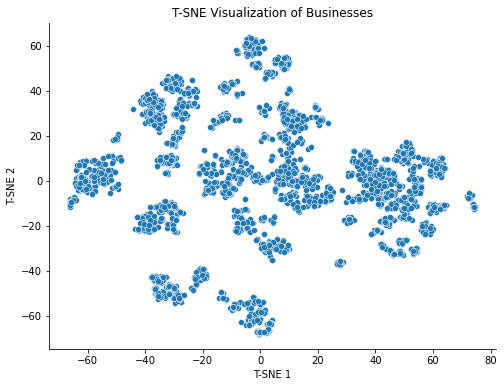

In [14]:
# Plot TSN-E decomposed business data
plt.figure(figsize = (8, 6))
sns.scatterplot(business_tsne[:,0], business_tsne[:,1])
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title('T-SNE Visualization of Businesses')
sns.despine()
plt.show()

It is apparent that some clustering exist in the dataset. Some businesses are similar to each other in terms of attributes and categories.

#### 5.4.2 Content-Based Filtering : Finding Businesses Most Similar to Favourite

The idea behind the content-based filtering deployed in this project is that, given a user id, the recommender selects the business the user rated the highest, and recommends businesses that are similar to the user's favourite.

To do this, a matrix containing all the pairwise cosine similarities between businesses is created.

#### Cosine Similarity Table

In [15]:
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
# Create pairwise cosine similarity matrix
cos_sim = cosine_similarity(business_scaled)

In [17]:
# Confirm shape
cos_sim.shape

(2992, 2992)

An array of all pairwise cosine similarities between all distinct businesses has been created. This is converted to a dataframe.

In [18]:
# Create Dataframe of cosine similarity matrix
cos_sim_df = pd.DataFrame(cos_sim, index = df_business.index, columns = df_business.index)

In [19]:
# Display. Note the matching indices and columns
cos_sim_df.head()

business_id             B5XSoSG3SfvQGtKEGQ1tSQ  gebiRewfieSdtt17PTW6Zg  \
business_id                                                              
B5XSoSG3SfvQGtKEGQ1tSQ                1.000000               -0.109073   
gebiRewfieSdtt17PTW6Zg               -0.109073                1.000000   
IDtLPgUrqorrpqSLdfMhZQ               -0.094529                0.312596   
qO9dNNIvNbCBd8ZgjxMxgQ               -0.051710               -0.370818   
SZU9c8V2GuREDN5KgyHFJw               -0.088547                0.545398   

business_id             IDtLPgUrqorrpqSLdfMhZQ  qO9dNNIvNbCBd8ZgjxMxgQ  \
business_id                                                              
B5XSoSG3SfvQGtKEGQ1tSQ               -0.094529               -0.051710   
gebiRewfieSdtt17PTW6Zg                0.312596               -0.370818   
IDtLPgUrqorrpqSLdfMhZQ                1.000000               -0.226623   
qO9dNNIvNbCBd8ZgjxMxgQ               -0.226623                1.000000   
SZU9c8V2GuREDN5KgyHFJw                0.214801               -0.260563   

business_id             SZU9c8V2GuREDN5KgyHFJw  YbnJYHNp_fHbI-hcFg48vQ  \
business_id                                                              
B5XSoSG3SfvQGtKEGQ1tSQ               -0.088547                0.152638   
gebiRewfieSdtt17PTW6Zg                0.545398               -0.015700   
IDtLPgUrqorrpqSLdfMhZQ                0.214801                0.010498   
qO9dNNIvNbCBd8ZgjxMxgQ               -0.260563                0.118707   
SZU9c8V2GuREDN5KgyHFJw                1.000000                0.008708   

business_id             6JFTijOMHB46yBoyVOjPCA  pUVRCYL8rT4I5Ry5FYkRsA  \
business_id                                                              
B5XSoSG3SfvQGtKEGQ1tSQ                0.243503               -0.079598   
gebiRewfieSdtt17PTW6Zg               -0.014755                0.131923   
IDtLPgUrqorrpqSLdfMhZQ               -0.030830                0.183622   
qO9dNNIvNbCBd8ZgjxMxgQ                0.059514                0.011067   
SZU9c8V2GuREDN5KgyHFJw                0.193032                0.161594   

business_id             29YqJwOGEuAWqlHZxMc1OA  34Eqv8jXgxg_EEwcsNgeeg  \
business_id                                                              
B5XSoSG3SfvQGtKEGQ1tSQ               -0.104432               -0.130509   
gebiRewfieSdtt17PTW6Zg                0.349082                0.575039   
IDtLPgUrqorrpqSLdfMhZQ                0.203733                0.450526   
qO9dNNIvNbCBd8ZgjxMxgQ               -0.399414               -0.348323   
SZU9c8V2GuREDN5KgyHFJw                0.238450                0.575331   

business_id             bjhCtlYHrkgA5Ku8l-rB3g  fWbQiSAErNcznezzkfCdvg  \
business_id                                                              
B5XSoSG3SfvQGtKEGQ1tSQ               -0.036291                0.175202   
gebiRewfieSdtt17PTW6Zg                0.301868               -0.385997   
IDtLPgUrqorrpqSLdfMhZQ                0.382218               -0.239143   
qO9dNNIvNbCBd8ZgjxMxgQ               -0.403536                0.148203   
SZU9c8V2GuREDN5KgyHFJw                0.167456               -0.252925   

business_id             -kY_HDP7IMvGl-kBIZVU4A  eL4lyE7LNoXEMvpcJ8WNVw  \
business_id                                                              
B5XSoSG3SfvQGtKEGQ1tSQ               -0.089265               -0.113283   
gebiRewfieSdtt17PTW6Zg                0.164728                0.319502   
IDtLPgUrqorrpqSLdfMhZQ                0.152196                0.129524   
qO9dNNIvNbCBd8ZgjxMxgQ               -0.065946               -0.255394   
SZU9c8V2GuREDN5KgyHFJw                0.426661                0.675670   

business_id             qdpdUjdkEUpzYDdce2yZng  13UbOVDFdxloxaient5XWA  \
business_id                                                              
B5XSoSG3SfvQGtKEGQ1tSQ               -0.028870                0.046661   
gebiRewfieSdtt17PTW6Zg                0.408782               -0.090751   
IDtLPgUrqorrpqSLdfMhZQ                0.529128               -0.062229 

#### Getting  Content-Based Recommendations using Cosine Matrix

Using the cosine matrix above, the content-based filtering recommender will make recommendations in the following algorithm.

1. For a given user, select a business that the user liked the most.
2. For such business, get the list of other businesses sorted by similarity in descending order.
    - 2.1 If a business at the top of the current list has **not** already been reviewed by the given user, add the business to a list of recommendations.
    - 2.2 If a business at the top of the current list has already been reviewed by the given user, read the next element in the list.
    - 2.3 Repeat 2.1 and 2.2 until five recommendations are added.

In [20]:
# Read in the original business table to map the business name from id
df_business_names = pd.read_csv('business.csv', index_col = 0)[['business_id', 'name']]

In [21]:
# Show df_business_names table
df_business_names.head()

,business_id,name
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ"
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store
2,tUFrWirKiKi_TAnsVWINQQ,Target
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery


A function making recommendation using the above-discussed algorith is created.

In [22]:
# Create a function making recommendations using content-based filtering

def get_recommendations_content(user : str) -> list:
    
    """
    Given a user id, this function prints a list of recommended businesses that
    the given user has not reviewed on yet.
    """
    
    # Select the given user's favourite business and return its business id 
    fav_business = (df.loc[df.user_id == user, ['business_id', 'adjusted_rating']].sort_values(by = 'adjusted_rating', ascending = False))['business_id'].values[0]
    
    # List of business ids sorted by cosine similarity
    index_recommendations = list(cos_sim_df.loc[fav_business].sort_values(ascending=False).index)[1:]
    
    # Sorted list of cosine similarities 
    sim_recommendations = list(cos_sim_df.loc[fav_business].sort_values(ascending=False).values)[1:]
    
    # Recommendation list - only businesses that have not yet been reviwed by a given user will be appended to this list
    recommendation_list = []
    
    # Similarity list corresponding to the recommendation list
    similarities = []
    
    # Initial index of 0
    index = 0
    
    # Add recommendation to list until 50 are collected
    while len(recommendation_list) < 50:
        
        # Select the business to recommend 
        fav = index_recommendations[index]
        
        # Select the corresponding cosine similarity
        sim = sim_recommendations[index]
        
        # If reviewer has not yet already written a review on the selected business, add to recommendation  & similarity lists
        if fav not in pd.unique(df.loc[df.user_id == user, 'business_id']):
            recommendation_list.append(fav)
            similarities.append(sim)
        index += 1
    
    # Print recommendations
    print(f'Because user "{user}" liked "{(df_business_names.loc[df_business_names["business_id"] == fav_business, "name"]).values[0]}", the following businesses are recommended:\n')
    
    for i, j in enumerate(recommendation_list):
        print(f'{(df_business_names.loc[df_business_names["business_id"] == j, "name"]).values[0]} ({round(similarities[i] * 100, 2)}% match)')
    
    # Return recommendation list
    return recommendation_list

The above-created function is implemented on an arbitrary user (i.e. user id : ZDCWEctaQHfJQT1sH_rMmA)

In [23]:
# Try running function
example_recommendations_content = get_recommendations_content('ZDCWEctaQHfJQT1sH_rMmA')

Because user "ZDCWEctaQHfJQT1sH_rMmA" liked "La Paloma Cafe", the following businesses are recommended:

Bibi Ji (67.77% match)
Somerset (66.06% match)
Les Marchands Restaurant & Wine Shop (65.64% match)
Mosto (64.87% match)
Gelson's (64.01% match)
Flor De Maiz (63.2% match)
Blackbird (60.28% match)
Reunion Kitchen + Drink (59.84% match)
Belmond El Encanto Dining Room (58.19% match)
Miro (52.5% match)
Four Seasons Resort The Biltmore Santa Barbara (51.68% match)
Tydes Restaurant (51.59% match)
Oliver's (51.11% match)
Angel Oak (44.79% match)
The Funk Zone (42.55% match)
Blush Lounge (42.1% match)
Killer Shrimp (41.83% match)
The Black Sheep (41.11% match)
Milk & Honey Tapas (39.79% match)
Nuance (39.74% match)
Crush Bar and Tap (38.57% match)
Live Culture (38.46% match)
Laplace Wine Bar & Shop (38.17% match)
The Lark (37.9% match)
EOS Lounge (37.81% match)
Cafe Luck (36.2% match)
The Project -- Corazón Cocina & Taproom (36.2% match)
Seven Bar & Kitchen (35.68% match)
Mezza Thyme (35.62

#### Plotting on TSN-E

The user ZDCWEctaQHfJQT1sH_rMmA's favourite business, as well as the recommended businesses, are plotted on the TSN-E plot created above.

In [24]:
# Create list of booleans of whether a certain business name is in the recommended list
recommended_business_content = np.isin(df_business.index, example_recommendations_content)

In [25]:
# Reshape
recommended_business_content = recommended_business_content.reshape(-1, 1)

In [26]:
# Create TSN-E dataframe
df_business_tsne_content = pd.DataFrame(np.hstack([business_tsne, recommended_business_content]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'recommended'])

In [27]:
# Find the key of the given user's favourite business
fav_key = df_business_names[df_business_names['name'] == "La Paloma Cafe"]['business_id'].values[0]

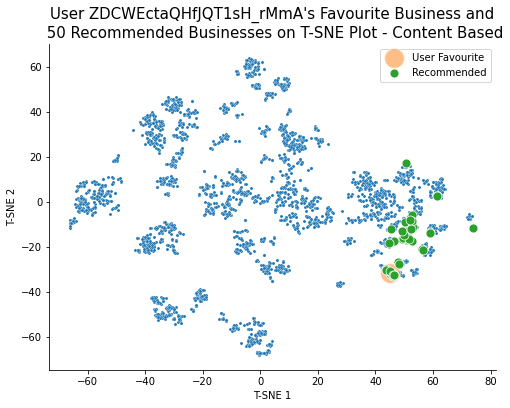

In [28]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_business_tsne_content[df_business_tsne_content['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10)
sns.scatterplot(data = pd.DataFrame(df_business_tsne_content.loc[fav_key, :]).T, x = 'T-SNE1', y = 'T-SNE2', s = 400, label = 'User Favourite', alpha = 0.5)
sns.scatterplot(data = df_business_tsne_content[df_business_tsne_content['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title("User ZDCWEctaQHfJQT1sH_rMmA's Favourite Business and\n 50 Recommended \
Businesses on T-SNE Plot - Content Based", size = 15)
sns.despine()
plt.legend()
plt.show()

On the T-SNE plot, it can be seen that the 50 recommended businesses are located close to user ZDCWEctaQHfJQT1sH_rMmA's favourite business as expected, since these businesses were selected based on their cosine similarity.

It is debatable as to whether this is a good recommendation, however, because one might prefer a more generalized recommendation than multiple recommendations similar to their favourite. 

In [29]:
# Business ids of businesses already visited and reviewed by ZDCWEctaQHfJQT1sH_rMmA
visited_keys = pd.unique(df[(df['user_id'] == 'ZDCWEctaQHfJQT1sH_rMmA') & (df['business_id'] != fav_key)]['business_id'])

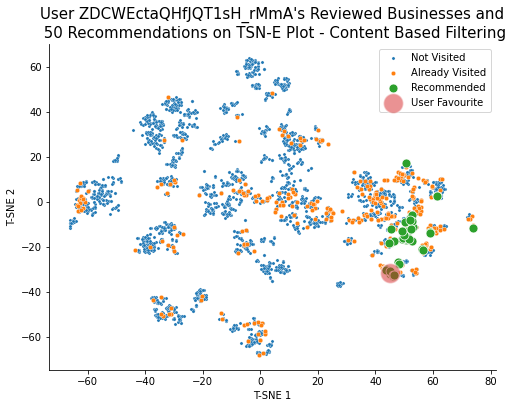

In [30]:
# Plot with places already visited
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_business_tsne_content[df_business_tsne_content['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10, label = 'Not Visited')
sns.scatterplot(data = df_business_tsne_content.loc[visited_keys], x = 'T-SNE1', y = 'T-SNE2', s = 20, label = 'Already Visited')
sns.scatterplot(data = df_business_tsne_content[df_business_tsne_content['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')
sns.scatterplot(data = pd.DataFrame(df_business_tsne_content.loc[fav_key, :]).T, x = 'T-SNE1', y = 'T-SNE2', s = 400, label = 'User Favourite', alpha = 0.5)
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title("User ZDCWEctaQHfJQT1sH_rMmA's Reviewed Businesses and\n 50 Recommendations \
on TSN-E Plot - Content Based Filtering", size = 15)
sns.despine()
plt.legend()
plt.show()

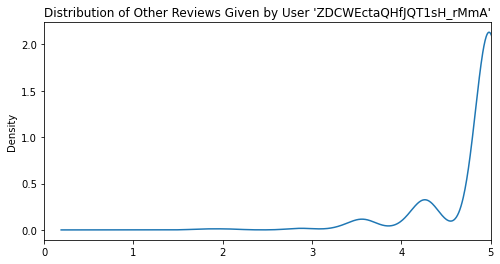

In [31]:
# Plot Distribution of User Rating Given by 'ZDCWEctaQHfJQT1sH_rMmA'

df[(df['user_id'] == 'ZDCWEctaQHfJQT1sH_rMmA') & (df['business_id'] != fav_key)].set_index('business_id')['adjusted_rating'].plot(kind = 'density', figsize = (8, 4))
plt.xlim([0,5])
plt.title("Distribution of Other Reviews Given by User 'ZDCWEctaQHfJQT1sH_rMmA'")
plt.show()

It can be seen that there are many other places that the user 'ZDCWEctaQHfJQT1sH_rMmA' have visited more widespread on the T-SNE plot. Many of these other places also received good reviews. However, the content-based filtering model with cosine similarity only made recommendations similar to the favourite.

#### 5.4.2 Collaborative Filtering : User-Based KNN Approach

The next approach is using collaborative filtering. Since the recommender is required to provide recommendations given a user, user-based approach is used. The surprise package is used to make the recommendations.

In [32]:
# Import surprise libraries
from surprise import Dataset
from surprise import Reader

The collaborative filtering method only requires three features : User, Item, and Rating. Therefore, a new dataframe `df_collab_user` is created to slice these features.

In [33]:
# Create a collaborative filtering dataframe
df_collab = df[['user_id', 'business_id', 'adjusted_rating']]

Due to the computation limitations, 20,000 data points are sampled.

In [34]:
# Sample 20,000 datapoints
df_collab = df_collab.sample(20000, random_state = 1)

In [35]:
# Instantiate reader with scale from 0 to 5
reader = Reader(rating_scale = (0,5))

A Surprise data object is loaded from `df_collab`.

In [36]:
data = Dataset.load_from_df(df_collab[['user_id', 'business_id', 'adjusted_rating']], reader)

In [37]:
data.df.shape

(20000, 3)

#### KNN with User Based Approach

For the user-based approach, the 'K Nearest Neighbour' algorithm is used. Given a user, all other users who have rated the same businesses as the given user will be identified. Such users will be sorted in terms of their cosine similarity with the given user.

Then, for each item not reviewed by the given user but rated by the other similar users, the average rating of K selected simliar users will be used as the prediction of the given user's rating on the item.

In [38]:
# Import K Nearest Neighbor with Means
from surprise import KNNWithMeans

In [39]:
# State similarity options
sim_options = {'name' : 'cosine', 'user_based' : True} # Use cosine similarity and user-based approach

# Instantiate KNN algorithm using the similarity option created
algo = KNNWithMeans(sim_options = sim_options)

The dataset is cross validated with the created algorithm. Root Mean Square Error and Mean Absolute Error are used as the measure of loss.

In [40]:
# Import Cross Validation
from surprise.model_selection.validation import cross_validate

In [41]:
# Cross Validate Data
cross_validate(algo, data, measures = ['rmse', 'mae'], cv = 5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([1.24952494, 1.26225042, 1.2219997 , 1.24417711, 1.22708439]),
 'test_mae': array([0.95272115, 0.96386543, 0.93972856, 0.95152573, 0.94037548]),
 'fit_time': (3.614840507507324,
  3.6184489727020264,
  3.1922390460968018,
  3.1500284671783447,
  3.1150636672973633),
 'test_time': (0.07452011108398438,
  0.0754544734954834,
  0.0712583065032959,
  0.07200026512145996,
  0.07799792289733887)}

In [42]:
# Train algorithm on the full dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


#### Getting  User-Based Collaborative Filtering Recommendations

The user-based collaborative filtering recommender will make recommendations in the following algorithm.

1. For a given user, find all the businesses not already reviewed by the user.
2. For such businesses, predict the rating with the user-based collaborative filtering recommender.
3. Sort the businesses by rating in descending order and make 50 recommendations.

In [43]:
# Create a function making recommendations using user-based collaborative filtering
        
def get_recommendations_collaborative_user_based(user : str) -> list:

    """
    Given a user id, this function prints a list of recommended businesses that
    the given user has not reviewed on yet.
    """
    # Find all business already reviewed by given user
    reviewed_business = pd.unique(df.loc[df['user_id'] == user, 'business_id'])
    
    # Find all businesses not yet reviewed by given user
    unreviewed_business = list(df_business[~np.isin(df_business.index, reviewed_business)].index)
    
    # Create an empty dictionary of ratings
    reviews = {}
    
    # For each unreviewed business, predict the rating using the algorithm and add business id and rating pair to dictionary
    for i in unreviewed_business:
        reviews[i] = algo.predict(user, i).est
    
    # Sort dictionary by descending order of ratings
    reviews = list(sorted(reviews.items(), key=lambda item: item[1], reverse = True))
    
    # Print Result
    print(f'For user "{user}" , Here are some other places people like you enjoyed:\n')
    
    for i in range(50):
        print(f'{(df_business_names.loc[df_business_names["business_id"] == reviews[i][0], "name"]).values[0]} ({round(reviews[i][1], 2)})')
    
    # Return 50 recommendations in a list
    return reviews[:50]

The above-created function is implemented on the same arbitrary user as previous (i.e. user id : ZDCWEctaQHfJQT1sH_rMmA)

In [44]:
# Run above-created function on an arbitrary user (i.e. user id : ZDCWEctaQHfJQT1sH_rMmA)
example_recommendations_collab_user = get_recommendations_collaborative_user_based('ZDCWEctaQHfJQT1sH_rMmA')

For user "ZDCWEctaQHfJQT1sH_rMmA" , Here are some other places people like you enjoyed:

Santa Barbara Shellfish Company (5)
Sakana Sushi Bar & Japanese (5)
Cafe Buenos Aires (5)
The Eagle Inn (5)
Meun Fan Thai Cafe (5)
MOXI - The Wolf Museum Of Exploration + Innovation (5)
The Cruisery (5)
Anacapa Plumbing (5)
AR Catering (5)
Taqueria El Buen Gusto (5)
Margerum Wine Company (5)
Federal Drug Co. (5)
Palazzio (5)
Eye & Vision Care (5)
Styling Bella Beauty Lounge (5)
Smithy Kitchen + Bar (5)
Rodney's Grill (5)
Jane (5)
Leadbetter Beach (5)
Flor De Maiz (5)
Arch Rock (5)
State & Fig (5)
Kimberly's Wigs and Salon (5)
Bristol Farms - Santa Barbara (5)
Toma Restaurant & Bar (5)
Mony's Mexican Food (5)
Alcazar Tapas Bar (5)
Shintori Sushi Factory (5)
Enjoy Cupcakes (5)
Santa Barbara Zoo (5)
Mission Street Ice Cream and Yogurt - Featuring McConnell's Fine (5)
Minhly's Nails (5)
Lux Nails & Spa (5)
Lucky Penny (5)
University Of California - Santa Barbara (5)
Santa Barbara City Library (5)
Santa

It is noted that most recommended businesses have ratings of 5, which becomes a problem. It becomes unclear as to how to rank these businesses all scored 5. The lack of precision in the prediction is likely due to the excessive number of businesses. The number of distinct businesses is so large that it does not happen very often many users review the same business. A user-based collaborative filtering would be more useful for a relatively smaller e-commerce platform where many users can rate a relatively smaller number of distinct items.

The recommended restaurants are plotted on the T-SNE plot.

In [45]:
# Create an index array of whether a business is one of the recommendations above or not
recommended_business_collab_user = np.isin(df_business.index, example_recommendations_collab_user).reshape(-1,1)

In [46]:
# Create a T-SNE dataframe for user-based collaborative filtering
df_business_tsne_collab_user = pd.DataFrame(np.hstack([business_tsne, recommended_business_collab_user]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'recommended'])

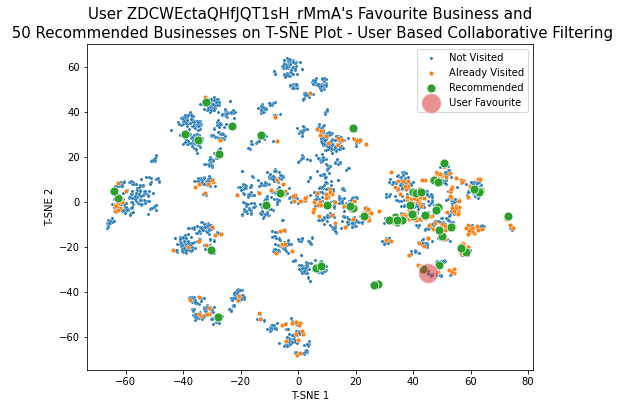

In [47]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_business_tsne_collab_user[df_business_tsne_collab_user['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10, label = 'Not Visited')
sns.scatterplot(data = df_business_tsne_collab_user.loc[visited_keys], x = 'T-SNE1', y = 'T-SNE2', s = 20, label = 'Already Visited')
sns.scatterplot(data = df_business_tsne_collab_user[df_business_tsne_collab_user['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')
sns.scatterplot(data = pd.DataFrame(df_business_tsne_collab_user.loc[fav_key, :]).T, x = 'T-SNE1', y = 'T-SNE2', s = 400, label = 'User Favourite', alpha = 0.5)
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title("User ZDCWEctaQHfJQT1sH_rMmA's Favourite Business and\n 50 Recommended \
Businesses on T-SNE Plot - User Based Collaborative Filtering", size = 15)
plt.legend()
plt.show()

While the prediction was less precise, it can be seen in the T-SNE plot for the user-based collaborative filtering that most of the recommendations are concentrated in the same general area as seen previously for content-based. It can also be seen that, unlike the content-based approach, the collaborative filtering attempts to recommendations in other clusters as well.

#### 5.4.4 Collaborative Filtering : Model-Based SVD (Singular-Vector Decomposition) Approach

Following the user-based collaborative filtering approach, another collaborative filtering employing matrix factorization is used (specifically, singular vector decomposition). By singular vector decomposition, an m x n user-item review matrix is factored to the multiplication of two matrices : an m x p user matrix, and p x n item matrix.

The p represent embedded features arbitrarily created during this process. In the m x p user matrix, the p represent the different levels of user preferences toward the p different features. In the p x n item matrix, the p features represent the extent to which each business belongs to the features.

In other words, the matrix factorization method algorithm attempts to quantify each user's preferences and businesses' attributes given the input data containing user-item-rating.

In [48]:
# Import libraries
from surprise import SVD # Singular Vector Decomposition
from surprise.model_selection import GridSearchCV # Grid Search

In [49]:
# Load full data
data = Dataset.load_from_df(df[['user_id', 'business_id', 'adjusted_rating']], reader)

A brief grid search is performed to create a reasonably good model.

In [50]:
# Parameter Grid
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}

# Instantiate grid search. User parameter grid created above, use Root Mean Square Error and Mean Absolute Error
# as loss metrics, and 5 fold cross validation
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=5)

# Fit grid search on data
gs.fit(data)

The losses and parameters associated with the best model within the search grid is reviewed.

In [51]:
# Print losses and Parameters
print(gs.best_score["rmse"])
print(gs.best_score["mae"])
print(gs.best_params["rmse"])

1.0806171401500877
0.8353039594240501
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [52]:
# Instantiate best estimator (i.e., the model with the least root mean square error)
algo_SVD = gs.best_estimator['rmse']

In [53]:
# Fit the best model on train set
algo_SVD.fit(trainset)

#### Getting  Model Based Collaborative Filtering Recommendations

The collaborative filtering recommender using SVD matrix factorization will make recommendations in the following algorithm.

1. For a given user, find all the businesses not already reviewed by the user.
2. For such businesses, predict the rating with the SVD collaborative filtering recommender.
3. Sort the businesses by rating in descending order and make 50 recommendations.

In [60]:
# Create a function making recommendations using model-based collaborative filtering

def get_recommendations_svd(user : str) -> list:
    
    """
    Given a user id, this function prints a list of recommended businesses that
    the given user has not reviewed on yet.
    """
    
    # Find all business already reviewed by given user
    reviewed_business = pd.unique(df.loc[df['user_id'] == user, 'business_id'])
    
     # Find all businesses not yet reviewed by given user
    unreviewed_business = list(df_business[~np.isin(df_business.index, reviewed_business)].index)
    
    # Create an empty dictionary of ratings
    reviews = {}
    
    # For each unreviewed business, predict the rating using the algorithm and add business id and rating pair to dictionary
    for i in unreviewed_business:
        reviews[i] = algo_SVD.predict(user, i).est
    
    # Sort dictionary by descending order of ratings
    reviews = list(sorted(reviews.items(), key=lambda item: item[1], reverse = True))
    
    # Print Result
    print(f'For user "{user}" , these businesses would align best with your preferences:\n')
    
    for i in range(50):
        print(f'{(df_business_names.loc[df_business_names["business_id"] == reviews[i][0], "name"]).values[0]} ({round(reviews[i][1], 2)})')
    
    # Return 50 recommendations in a list
    return reviews[:50]

The above-created function is implemented on the same arbitrary user as previous (i.e. user id : ZDCWEctaQHfJQT1sH_rMmA)

In [61]:
# Run above-created function on an arbitrary user (i.e. user id : ZDCWEctaQHfJQT1sH_rMmA)
example_recommendations_svd = get_recommendations_svd('ZDCWEctaQHfJQT1sH_rMmA')

For user "ZDCWEctaQHfJQT1sH_rMmA" , these businesses would align best with your preferences:

Buena Onda (4.99)
Sustainable Wine Tours (4.95)
Mony's Mexican Food (4.91)
Mesa Verde (4.9)
Cal Coast Adventures (4.9)
Harbor House Inn (4.88)
Jump On The School Bus (4.88)
The Closet Trading Company (4.87)
Arroyo Burro Beach (4.87)
Channel Islands Outfitters (4.85)
Celebration Cruises (4.85)
Preferred Limousine & Transportation (4.85)
Spa Cía (4.84)
Toma Restaurant & Bar (4.84)
Embermill (4.84)
MOXI - The Wolf Museum Of Exploration + Innovation (4.84)
University Club of Santa Barbara (4.84)
The Narrative Loft (4.83)
Little Kitchen (4.83)
DeeTours of Santa Barbara (4.83)
Wine Canyon Tours (4.83)
Grapeline Wine Tours (4.83)
Bettina (4.82)
Carlyle Salon and Style Bar (4.81)
Taste Santa Barbara Food Tours (4.81)
Tondi Gelato (4.81)
Downey's (4.81)
SB Buggie (4.81)
Santa Barbara Auto Group (4.8)
Bob Holzer Towing (4.8)
Cheshire Cat Inn (4.79)
Tamira (4.79)
Santa Barbara Adventure Company (4.79)
Sa

As with the above two algorithms, the businesses recommended using the SVD recommender are shown on the T-SNE plot.

In [62]:
# Creating an index array of whether a business is one of the recommendations above or not
recommended_business_svd = np.isin(df_business.index, example_recommendations_svd).reshape(-1,1)

In [63]:
# Create the T-SNE dataframe for the SVD recommended businesses 
df_business_tsne_svd = pd.DataFrame(np.hstack([business_tsne, recommended_business_svd]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'recommended'])

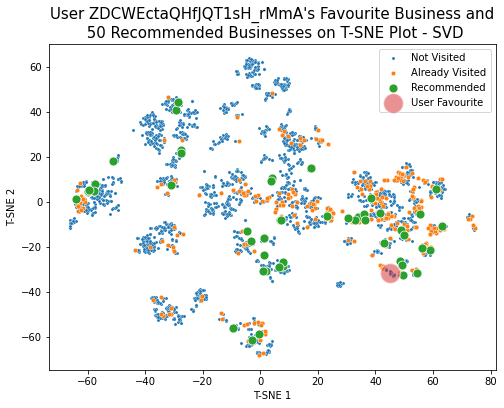

In [64]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_business_tsne_svd[df_business_tsne_svd['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10, label = 'Not Visited')
sns.scatterplot(data = df_business_tsne_svd.loc[visited_keys], x = 'T-SNE1', y = 'T-SNE2', s = 20, label = 'Already Visited')
sns.scatterplot(data = df_business_tsne_svd[df_business_tsne_svd['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')
sns.scatterplot(data = pd.DataFrame(df_business_tsne_svd.loc[fav_key, :]).T, x = 'T-SNE1', y = 'T-SNE2', s = 400, label = 'User Favourite', alpha = 0.5)
plt.legend()
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title("User ZDCWEctaQHfJQT1sH_rMmA's Favourite Business and\n 50 Recommended \
Businesses on T-SNE Plot - SVD", size = 15)
plt.show()

As with the user-based collaborative filtering approach, the model based approach also makes recommendations in other clusters than that of the favourite business.

#### 5.4.5 Baseline Model Comparison

Between the user-based and SVD collaborative filtering, it can be seen that the SVD approach has performed better both in terms of root mean square error and mean absolute error. 

|Model | RMSE | MAE |
| --- | --- | --- |
|**User-Based**| 1.21 | 0.93 |
|**SVD**| 1.08 | 0.84 |


Therefore, SVD is chosen over the user-based approach and compared against the content-based approach.

The content-based approach, however, makes recommendation based on cosine similarity and does not make predictions on the rating. Therefore, the performances of these two models are compared using the following two methods:

1. For the arbitrary user seen earlier (i.e. 'ZDCWEctaQHfJQT1sH_rMmA'), the features of the user's favourite business are compared against the mean vector of the 50 businesses recommended by the content-based and SVD collaborative filtering methods, and their cosine distances are compared


2. For the arbitrary user seen earlier (i.e. 'ZDCWEctaQHfJQT1sH_rMmA'), the mean vector of the user's top 50 businesses are compared against that of the 50 businesses recommended by the content-based and SVD collaborative filtering methods, and their cosine distances are compared.

First, the business dataframe is scaled.

In [65]:
# Scale Business DataFrame
df_business_scaled = pd.DataFrame(business_scaled, index = df_business.index, columns = df_business.columns)

Then these scaled values are applied to a copy of the main dataframe `df`.

In [66]:
# Create a copy of the main dataframe to generate a scaled dataframe
df_scaled = df.copy()

In [67]:
# Apply scale to the copy
for col in df_business_scaled.columns:
    
    # Create a Series with the index being the business_id and value the scaled data
    replace_dict = df_business_scaled[col]
    
    # Replace the existing columns in df_scaled with the scaled values
    df_scaled[col] = df_scaled['business_id'].map(replace_dict)

In [68]:
# Drop user data from df_scaled
cols_to_drop = df_scaled.loc[:1, 'user_review_count' : 'average_stars'].columns
df_scaled = df_scaled.drop(columns = cols_to_drop)

In [69]:
# Create a temporary dataframe for model performnace check. From this dataframe, the top 50 businesses of the 
# user in question, as well as the favourite business, will be extracted
df_check = pd.concat([df_scaled.loc[df_scaled['user_id'] == 'ZDCWEctaQHfJQT1sH_rMmA', :'wifi_paid'], df_scaled.loc[df_scaled['user_id'] == 'ZDCWEctaQHfJQT1sH_rMmA', ['adjusted_rating']]], axis = 1)

In [70]:
# Top 50 businesses of arbitrary user 'ZDCWEctaQHfJQT1sH_rMmA'
df_check_positive = df_check.sort_values(by = 'adjusted_rating', ascending = False).head(50)

In [71]:
# select Numeric columns
cols = list(df_check_positive.iloc[:,3:-1].columns)

In [72]:
pos_means = [] # Create an empty list

# Iterating over each feature, compute the column mean of each of the top 50 businesses and append to list above   
for i, j in enumerate(cols):
    pos_mean = df_check_positive[j].mean()
    pos_means.append(pos_mean)

In [73]:
# 50 businesses recommended using content-based approach
df_check_content = df_business_scaled[np.isin(df_business.index, example_recommendations_content)]

# 50 businesses recommended using SVD collaborative filtering approach
df_check_collab = df_business_scaled[np.isin(df_business.index, example_recommendations_svd)]

In [74]:
content_means = [] # Create an empty list of vector mean of 50 recommendations by content-based recommender
collab_means = [] # Create an empty list of vector mean of 50 recommendations by SVD recommender

# Iterating over each feature, compute the column mean of each of the 50 recommendations
# by content-based and SVD collaborative filtering recommenders

for i, j in enumerate(cols):
    content_mean = df_check_content[j].mean()
    content_means.append(content_mean)
    collab_mean = df_check_collab[j].mean()
    collab_means.append(collab_mean)

In [75]:
# Extract the vector of the arbitrary user ZDCWEctaQHfJQT1sH_rMmA's favourite business 
fav_business = list(df_scaled.loc[df_scaled['business_id'] == fav_key, 'business_review_count':'wifi_paid'].mean(axis = 0))

The accuracy of each recommender is reviewed by the cosine distance from the actual businesses liked by the user.

In [76]:
from scipy.spatial.distance import cosine

print('Top 50 Businesses')
print('---------------------')
print(f'Cosine Distance between Top 50 Businesses and 50 Recommendations by Content-Based : {round(cosine(pos_means, content_means), 2)}')
print(f'Cosine Distance between Top 50 Businesses and 50 Recommendations by SVD : {round(cosine(pos_means, collab_means), 2)}')
print('\n')
print('Favourite Businesses')
print('---------------------')
print(f'Cosine Distance between Favourite Businesses and 50 Recommendations by Content-Based : {round(cosine(fav_business, content_means), 2)}')
print(f'Cosine Distance between Favourite and 50 Recommendations by SVD : {round(cosine(fav_business, collab_means), 2)}')

Top 50 Businesses
---------------------
Cosine Distance between Top 50 Businesses and 50 Recommendations by Content-Based : 0.33
Cosine Distance between Top 50 Businesses and 50 Recommendations by SVD : 0.32


Favourite Businesses
---------------------
Cosine Distance between Favourite Businesses and 50 Recommendations by Content-Based : 0.26
Cosine Distance between Favourite and 50 Recommendations by SVD : 0.92


It can be seen that, using the user's top 50 businesses, the performances of the content-based and SVD approaches are similar. However, looking at the favourite business, the more generalized SVD approach returns recommendations that are more distant from the favourite business compared the to content-based approach.

Visualizing these vectors of businesses:

#### User's Top 50 Businesses vs Recommendations

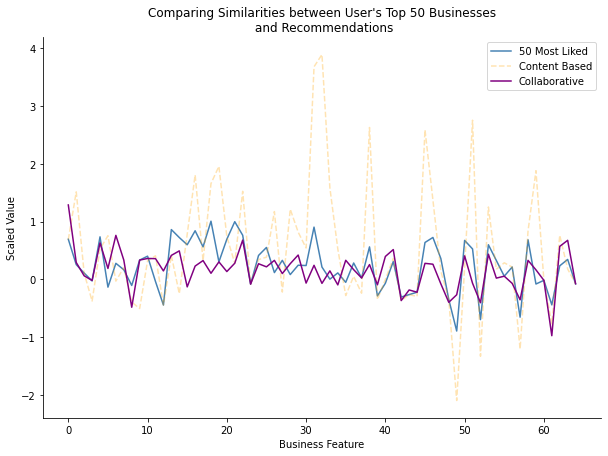

In [77]:
# Plot
plt.figure(figsize = (10, 7))
plt.plot(pos_means, c = 'steelblue', label = '50 Most Liked')
plt.plot(content_means, c = 'orange', label = 'Content Based', linestyle = '--', alpha = 0.3)
plt.plot(collab_means, c = 'purple', label = 'Collaborative')
plt.title("Comparing Similarities between User's Top 50 Businesses\n and Recommendations")
plt.xlabel('Business Feature')
plt.ylabel('Scaled Value')
sns.despine()
plt.legend()
plt.show()

It can be seen that, while the collaborative filtering method provides business features closer to the 50 most liked businesses in terms of the **magnitude**, the content based is more similar in terms of the **shape** (i.e., when the graph of the 50 most liked businesses increases, that of the content-based recommender also increases and vice versa).

With the cosine distance between two business vectors as the metric for similarity, the content-based approach recommends businesses that are more similar to those actually liked by a given user, compared to the colalborative SVD approach.

#### User's Favourite Business vs Recommendations

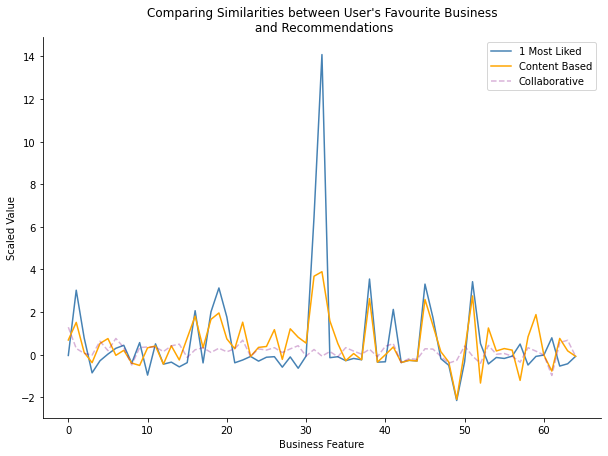

In [78]:
# Plot
plt.figure(figsize = (10, 7))
plt.plot(fav_business, c = 'steelblue', label = '1 Most Liked')
plt.plot(content_means, c = 'orange', label = 'Content Based')
plt.plot(collab_means, c = 'purple', label = 'Collaborative', linestyle = '--', alpha = 0.3)
plt.title("Comparing Similarities between User's Favourite Business\n and Recommendations")
plt.xlabel('Business Feature')
plt.ylabel('Scaled Value')
sns.despine()
plt.legend()
plt.show()

When compared to the user's most liked business, the content-based approach provides much more similar businesses than the collaborative SVD approach.

To review these cosine distances between the two options for other users as well, 1000 users are sampled and the distances are averaged.

In [79]:
# Recreate a function making recommendations using content-based filtering (this time without printing results)

def get_recommendations_content(user : str) -> list:
    
    """
    Given a user id, this function prints a list of recommended businesses that
    the given user has not reviewed on yet.
    """
    
    # Select the given user's favourite business and return its business id 
    fav_business = (df.loc[df.user_id == user, ['business_id', 'adjusted_rating']].sort_values(by = 'adjusted_rating', ascending = False))['business_id'].values[0]
    
    # List of business ids sorted by cosine similarity
    index_recommendations = list(cos_sim_df.loc[fav_business].sort_values(ascending=False).index)[1:]
    
    # Sorted list of cosine similarities 
    sim_recommendations = list(cos_sim_df.loc[fav_business].sort_values(ascending=False).values)[1:]
    
    # Recommendation list - only businesses that have not yet been reviwed by a given user will be appended to this list
    recommendation_list = []
    
    # Similarity list corresponding to the recommendation list
    similarities = []
    
    # Initial index of 0
    index = 0
    
    # Add recommendation to list until 50 are collected
    while len(recommendation_list) < 50:
        
        # Select the business to recommend 
        fav = index_recommendations[index]
        
        # Select the corresponding cosine similarity
        sim = sim_recommendations[index]
        
        # If reviewer has not yet already written a review on the selected business, add to recommendation  & similarity lists
        if fav not in pd.unique(df.loc[df.user_id == user, 'business_id']):
            recommendation_list.append(fav)
            similarities.append(sim)
        index += 1
    
    # Return recommendation list
    return recommendation_list

In [80]:
# Recreate a function making recommendations using model-based collaborative filtering (Thistime without printing results)

def get_recommendations_svd(user : str) -> list:
    
    """
    Given a user id, this function prints a list of recommended businesses that
    the given user has not reviewed on yet.
    """
    
    # Find all business already reviewed by given user
    reviewed_business = pd.unique(df.loc[df['user_id'] == user, 'business_id'])
    
     # Find all businesses not yet reviewed by given user
    unreviewed_business = list(df_business[~np.isin(df_business.index, reviewed_business)].index)
    
    # Create an empty dictionary of ratings
    reviews = {}
    
    # For each unreviewed business, predict the rating using the algorithm and add business id and rating pair to dictionary
    for i in unreviewed_business:
        reviews[i] = algo_SVD.predict(user, i).est
    
    # Sort dictionary by descending order of ratings
    reviews = list(sorted(reviews.items(), key=lambda item: item[1], reverse = True))
    
    # Return 50 recommendations in a list
    return reviews[:50]

The analysis seen above is repeated on 1000 random users

In [81]:
# Create lists of cosine distances one for content-based and one for SVD
overall_cos_means_content = []
overall_cos_means_svd = []

for i in np.random.choice(pd.unique(df_scaled['user_id']),1000):
    
    # Create a temporary dataframe for model performance check. From this dataframe, the top 50 businesses of the 
    # user in question, as well as the favourite business, will be extracted
    df_check_i = pd.concat([df_scaled.loc[df_scaled['user_id'] == i, :'wifi_paid'], df_scaled.loc[df_scaled['user_id'] == i, ['adjusted_rating']]], axis = 1)
    df_check_positive_i = df_check_i.sort_values(by = 'adjusted_rating', ascending = False).head(50)
    cols = list(df_check_positive_i.iloc[:,3:-1].columns)
    
    pos_means_i = [] # Create an empty list

    # Iterating over each feature, compute the column mean of each of the top 50 businesses and append to list above   
    for k, j in enumerate(cols):
        pos_mean_i = df_check_positive_i[j].mean()
        pos_means_i.append(pos_mean_i)
    
    content_means_i = [] # Create an empty list of vector means of 50 recommendations by content-based recommender
    collab_means_i = [] # Create an empty list of vector means of 50 recommendations by SVD recommender

    # Iterating over each feature, compute the column mean of each of the 50 recommendations
    # by content-based and SVD collaborative filtering recommenders

    # 50 businesses recommended using content-based approach
    df_check_content_i = df_business_scaled[np.isin(df_business.index, get_recommendations_content(i))]

    # 50 businesses recommended using SVD collaborative filtering approach
    df_check_collab_i = df_business_scaled[np.isin(df_business.index, get_recommendations_svd(i))]
    
    # Iterate over the business features and compute mean of 50 recommendations
    for l, m in enumerate(cols):
        # Content Based
        content_mean_i = df_check_content_i[m].mean()
        content_means_i.append(content_mean_i)
        
        # SVD Collaborative Filtering
        collab_mean_i = df_check_collab_i[m].mean()
        collab_means_i.append(collab_mean_i)
    
    # Compute Cosine Distance with Max 50 Business Actually Liked by User
    overall_cos_means_content.append(cosine(pos_means_i, content_means_i))
    overall_cos_means_svd.append(cosine(pos_means_i, collab_means_i))
    

In [84]:
print('Content-Based Filtering')
print(f'Mean Cosine Distance between Actually Liked and Recommended Businesses : {round(sum(overall_cos_means_content) / len(overall_cos_means_content), 2)}')

Content-Based Filtering
Mean Cosine Distance between Actually Liked and Recommended Businesses : 0.19


In [85]:
print('SVD Collaborative Filtering')
print(f'Mean Cosine Distance between Actually Liked and Recommended Businesses : {round(sum(overall_cos_means_svd) / len(overall_cos_means_svd), 2)}')

SVD Collaborative Filtering
Mean Cosine Distance between Actually Liked and Recommended Businesses : 0.68


Generally, in terms of similarity between the actually-liked and recommended businesses, the content-based approach performs better than collaborative filtering. This is especially true if the number of businesses a user reviewed is small, which is the case for most users.

### 5.5 Neural Network

Following the content-based and collaborative filtering, neural network is deployed to find the mathematical relationship between the user/business information and the adjusted rating. Specifically, Pytorch is used to create the neural network.

#### 5.5.1 Train-Test Split

First, the neural network model is split to independent and target variables.

In [86]:
# Independent variable
X = df.iloc[:,:-1]

# Dependent variable
y = df.iloc[:,-1]

Then, the train and test sets are split. Standard scalers are fit on the train set, and the test and train sets are transformed based on the scalers. 

In [87]:
# Import StandardScaler and train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [88]:
# Train and test split using 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### 5.5.2 Scaling

Each of the business and user datasets are scaled on separate standard scalers. The scaled values are then mapped back to the main dataframe.

In [89]:
# Instantiate scaler for businesses
business_scaler = StandardScaler()

# Instantiate scaler for users
user_scaler = StandardScaler()

##### Train Set

In [90]:
# Slice business columns
X_train_business = X_train.loc[:,'business_id':'wifi_paid']

# Drop duplicated businesses
X_train_business.drop_duplicates(subset = 'business_id', keep = 'first', inplace = True)

In [91]:
# Scale business train set
X_train_business_scaled = business_scaler.fit_transform(X_train_business.iloc[:,1:])

In [92]:
# Dataframe of scaled business train set
X_train_business_replace_df = pd.DataFrame(X_train_business_scaled, index = X_train_business.business_id, columns = X_train_business.iloc[:,1:].columns)

In [93]:
# Convert business-related values in the train set to the scaled valeus
for col in X_train_business_replace_df.columns:
    replace_dict = X_train_business_replace_df[col]
    X_train[col] = X_train['business_id'].map(replace_dict)

In [94]:
# Slice user columns
X_train_user = pd.concat([X_train.loc[:, 'user_id'], X_train.loc[:, 'user_review_count':]],axis = 1)

In [95]:
# Drop duplicated users
X_train_user.drop_duplicates(subset = 'user_id', keep = 'first', inplace = True)

In [96]:
# Scale user train set
X_train_user_scaled = user_scaler.fit_transform(X_train_user.iloc[:,1:])

In [97]:
# Dataframe of scaled user train set
X_train_user_replace_df = pd.DataFrame(X_train_user_scaled, index = X_train_user.user_id, columns = X_train_user.iloc[:,1:].columns)

In [98]:
# Convert user-related values in the train set to the scaled values
for col in X_train_user_replace_df.columns:
    replace_dict = X_train_user_replace_df[col]
    X_train[col] = X_train['user_id'].map(replace_dict)

In [99]:
# Remove review/user/business ids
X_train = X_train.iloc[:, 3:]

In [100]:
# Confirm shape
X_train.shape

(207004, 84)

##### Test Set

In [101]:
# Slice business columns
X_test_business = X_test.loc[:,'business_id':'wifi_paid']

# Drop duplicated businesses
X_test_business.drop_duplicates(subset = 'business_id', keep = 'first', inplace = True)

In [102]:
# Scale business test set
X_test_business_scaled = business_scaler.transform(X_test_business.iloc[:,1:])

In [103]:
# Dataframe of scaled business test set
X_test_business_replace_df = pd.DataFrame(X_test_business_scaled, index = X_test_business.business_id, columns = X_test_business.iloc[:,1:].columns)

In [104]:
# Convert business-related values in the test set to the scaled valeus
for col in X_test_business_replace_df.columns:
    replace_dict = X_test_business_replace_df[col]
    X_test[col] = X_test['business_id'].map(replace_dict)

In [105]:
# Slice user columns
X_test_user = pd.concat([X_test.loc[:, 'user_id'], X_test.loc[:, 'user_review_count':]],axis = 1)

In [106]:
# Drop duplicated users
X_test_user.drop_duplicates(subset = 'user_id', keep = 'first', inplace = True)

In [107]:
# Scale user test set
X_test_user_scaled = user_scaler.transform(X_test_user.iloc[:,1:])

In [108]:
# Dataframe of scaled user test set
X_test_user_replace_df = pd.DataFrame(X_test_user_scaled, index = X_test_user.user_id, columns = X_test_user.iloc[:,1:].columns)

In [109]:
# Convert user-related values in the test set to the scaled values
for col in X_test_user_replace_df.columns:
    replace_dict = X_test_user_replace_df[col]
    X_test[col] = X_test['user_id'].map(replace_dict)

In [110]:
# Remove review/user/business ids
X_test = X_test.iloc[:, 3:]

In [111]:
# Confirm shape
X_test.shape

(51752, 84)

#### 5.5.3 Model Construction

The prediction of a user's rating on a particular business is made using neural network. Pytorch is used to create a model object in the object-oriented-programming (OOP) manner.

In [112]:
# Import libraries
import torch
import torch.nn as nn
from tqdm.notebook import tnrange, tqdm_notebook

In [113]:
# Create a new class for Rating Predictor
class RatingPredictor(nn.Module):

    def __init__(self):
        
        super().__init__()
        
        # Neural Network Architecture
        self.neural_net =  nn.Sequential(nn.Linear(84, 400), # Linear combination (84 nodes to 400 nodes)
                           nn.ReLU(), # ReLU Activation
                           nn.BatchNorm1d(400), # Batch Normalize
                           nn.Dropout(p=0.2), # 20% Drop out
                           nn.Linear(400,200), # Linear combination (400 nodes to 200 nodes)
                           nn.ReLU(), # ReLU Activation
                           nn.BatchNorm1d(200), # Batch Normalize
                           nn.Dropout(p=0.2), # 20% Drop out
                           nn.Linear(200,100), # Linear combination (200 nodes to 100 nodes)
                           nn.ReLU(), # ReLU Activation
                           nn.BatchNorm1d(100), # Batch Normalize
                           nn.Dropout(p=0.2), # 20% Drop out
                           nn.Linear(100,50), # Linear combination (100 nodes to 50 nodes)
                           nn.ReLU(), # ReLU Activation
                           nn.BatchNorm1d(50), # Batch Normalize
                           nn.Dropout(p=0.2), # 20% Drop out
                           nn.Linear(50,25), # Linear combination (50 nodes to 25 nodes)
                           nn.ReLU(), # ReLU Activation
                           nn.BatchNorm1d(25), # Batch Normalize
                           nn.Dropout(p=0.2), # 20% Drop out
                           nn.Linear(25,10), # Linear combination (25 nodes to 10 nodes)
                           nn.ReLU(), # ReLU Activation
                           nn.BatchNorm1d(10), # Batch Normalize
                           nn.Dropout(p=0.2), # 20% Drop out
                           nn.Linear(10,5), # Linear combination (10 nodes to 5 nodes)
                           nn.ReLU(), # ReLU Activation
                           nn.BatchNorm1d(5), # Batch Normalize
                           nn.Linear(5,1), # Linear combination (5 nodes to 1 node)
                           nn.Sigmoid()) # Sigmoid Activation Function

    def forward(self, x):
        """Perform forward pass."""
            
        # pass through the layers
        output = self.neural_net(x) * 5 # Ensure Output value is between 0 and 5
        
        # return output
        return output
    
    def predict(self, x):
        
        # same as forward in this case, because the output of our Neural Network
        # is the prediction
              
        return self.forward(x)

In [114]:
# Instantiate the model, the loss criterion, and the optimizer

# Model
nn_rater = RatingPredictor()

# Loss Function
mse_loss = nn.MSELoss() # Minimize Mean Square Error

# Optimizer
optimizer = torch.optim.Adam(nn_rater.parameters(), lr=.2) # Adam Optimizer

In [115]:
# Convert train and test sets to tensors

# Train sets
X_train_torch = torch.tensor(X_train.values, dtype = torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

# Test sets
X_test_torch = torch.tensor(X_test.values, dtype = torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [116]:
# Ensure sizes match
print(X_train_torch.shape)
print(y_train_torch.shape)

torch.Size([207004, 84])
torch.Size([207004, 1])


In [117]:
# Now run for 400 epochs
for epoch in tnrange(400, desc="Total epochs: "):
  
    # Clear gradients (pytorch accumulates gradients by default)
    optimizer.zero_grad() 

    # Calculate outputs
    output_values = nn_rater(X_train_torch) # or alternatively nn_rater.forward(X_train), as specified

    # Calculate loss
    loss = mse_loss(output_values, y_train_torch) 

    # Backpropagation & weight adjustment
    loss.backward()
    optimizer.step()

print(f"Optimization ended successfully")

Total epochs:   0%|          | 0/400 [00:00<?, ?it/s]

Optimization ended successfully


#### 5.5.4 Model Performance Evaluation

The performance of the neural network model is evlauated on two metrics : Root mean squared error (RMSE), and mean absolute error (MAE).

In [118]:
# Import Mean Square Error and Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [119]:
# Mean Absolute Error
print('Root Mean Square Error')
print('---------------------')

# Train
y_pred = nn_rater.predict(X_train_torch)
print(f'Train : {round(mean_squared_error(y_train_torch.numpy(), y_pred.detach().numpy(), squared = False), 2)}')

# Test
y_pred = nn_rater.predict(X_test_torch)
print(f'Test : {round(mean_squared_error(y_test_torch.numpy(), y_pred.detach().numpy(), squared = False), 2)}')

Root Mean Square Error
---------------------
Train : 0.9300000071525574
Test : 0.9599999785423279


In [120]:
# Mean Absolute Error
print('Mean Absolute Error')
print('---------------------')

# Train
y_pred = nn_rater.predict(X_train_torch)
print(f'Train : {round(mean_absolute_error(y_train_torch.numpy(), y_pred.detach().numpy()), 2)}')

# Test
y_pred = nn_rater.predict(X_test_torch)
print(f'Test : {round(mean_absolute_error(y_test_torch.numpy(), y_pred.detach().numpy()), 2)}')

Mean Absolute Error
---------------------
Train : 0.6700000166893005
Test : 0.6800000071525574


In terms of Root Mean Square Error and Mean Absolute Error, the neural network outperforms the SVD collaborative filtering. The distribution of rating prediction is reviewed.

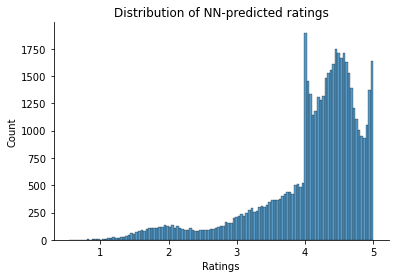

In [121]:
plt.figure(figsize = (6, 4))
sns.histplot(y_pred.detach().numpy().reshape(-1))
plt.title('Distribution of NN-predicted ratings')
plt.xlabel('Ratings')
sns.despine()
plt.show()

It can be seen that most reviews are predicted to be between 4 and 5, which coincides with the distribution of actual reviews.

#### 5.5.5 Neural Network Recommendations

Using the neural network, recommendations are made for the same arbitrary user as seen above. First, the neural network is trained on the entire dataset. 

#### Train on Entire Set

In [122]:
# Scale business set
X_business_scaled = business_scaler.fit_transform(df_business)

In [123]:
# Dataframe of scaled business set
X_business_replace_df = pd.DataFrame(X_business_scaled, index = df_business.index, columns = df_business.columns)

In [124]:
# Create a copy of df to be scaled
df_scaled = df.copy()

In [125]:
# Convert business-related values in the main dataframe to the scaled values
for col in X_business_replace_df.columns:
    replace_dict = X_business_replace_df[col]
    df_scaled[col] = df['business_id'].map(replace_dict)

In [126]:
# Slice user columns
df_user = pd.concat([df.loc[:, 'user_id'], df.loc[:, 'user_review_count':'average_stars']], axis = 1)

In [127]:
# Drop duplicate values
df_user.drop_duplicates(subset = 'user_id', keep = 'first', inplace = True)

In [128]:
# Set user_id as index
df_user.set_index('user_id', inplace = True)

In [129]:
# Scale user set
X_user_scaled = user_scaler.fit_transform(df_user)

In [130]:
# Dataframe of scaled user set
X_user_replace_df = pd.DataFrame(X_user_scaled, index = df_user.index, columns = df_user.columns)

In [131]:
# Convert user-related values in the main dataframe to the scaled values
for col in X_user_replace_df.columns:
    replace_dict = X_user_replace_df[col]
    df_scaled[col] = df['user_id'].map(replace_dict)

In [132]:
# Create new train set by removing review/user/business ids
df_train = df_scaled.iloc[:, 3:]

In [133]:
# Confirm shape
df_train.shape

(258756, 85)

In [134]:
# Create independent and dependent sets
X = df_train.values[:,:-1]
y = df_train.values[:,-1].reshape(-1,1)

In [135]:
# Convert X and y to Torch tensors
X_tensor = torch.tensor(X, dtype = torch.float32)
y_tensor = torch.tensor(y, dtype = torch.float32)

In [136]:
# Instantiate the model, the loss criterion, and the optimizer

# Model
nn_rater = RatingPredictor()

# Loss Function
mse_loss = nn.MSELoss() # Minimize Mean Square Error

# Optimizer
optimizer = torch.optim.Adam(nn_rater.parameters(), lr=.2) # Adam Optimizer

In [137]:
# Now run for 400 epochs
for epoch in tnrange(400, desc="Total epochs: "):
  
    # Clear gradients (pytorch accumulates gradients by default)
    optimizer.zero_grad() 

    # Calculate outputs
    output_values = nn_rater(X_tensor) # or alternatively nn_rater.forward(X_train), as specified

    # Calculate loss
    loss = mse_loss(output_values, y_tensor) 

    # Backpropagation & weight adjustment
    loss.backward()
    optimizer.step()

print(f"Optimization ended successfully")

Total epochs:   0%|          | 0/400 [00:00<?, ?it/s]

Optimization ended successfully


The model performances in terms of Root Mean Square Error and Mean Absolute Error are reviewed again.

In [138]:
# Root Mean Square Error
print('Root Mean Square Error')
print('---------------------')

# Train
y_pred = nn_rater.predict(X_tensor)
print(f'Train : {round(mean_squared_error(y_tensor.numpy(), y_pred.detach().numpy(), squared = False), 2)}')

Root Mean Square Error
---------------------
Train : 0.9300000071525574


In [139]:
# Mean Absolute Error
print('Mean Absolute Error')
print('---------------------')

# Train
y_pred = nn_rater.predict(X_tensor)
print(f'Train : {round(mean_absolute_error(y_tensor.numpy(), y_pred.detach().numpy()), 2)}')

Mean Absolute Error
---------------------
Train : 0.6700000166893005


#### Getting Neural Network Recommendations

The collaborative filtering recommender using neural network will make recommendations in the following algorithm.

1. For a given user, find all the businesses not already reviewed by the user.
2. For such businesses, create a dataset containing all the pairwise combinations with the given user.
3. Predict the rating for all the pairwise combinations using the neural network model created.
4. Sort the businesses by rating in descending order and make 50 recommendations.

In [140]:
# Create a function making recommendations using Neural Network

def get_recommendations_nn(user : str) -> list:
    
    """
    Given a user id, this function prints a list of recommended businesses that
    the given user has not reviewed on yet.
    """
    
    # Find all business already reviewed by given user
    reviewed_business = pd.unique(df.loc[df['user_id'] == user, 'business_id'])
    
     # Find all businesses not yet reviewed by given user
    unreviewed_business = list(df_business[~np.isin(df_business.index, reviewed_business)].index)
    
    # Create all user-business combinations for the given user and all businesses the user did not review 
    df_unreviewed_businesses = X_business_replace_df.loc[unreviewed_business].reset_index(drop = False)
    df_user_recommend = pd.concat([X_user_replace_df.loc[[user],:]]* len(df_unreviewed_businesses), ignore_index=True)
    df_combined = pd.concat([df_unreviewed_businesses, df_user_recommend], axis = 1).set_index('business_id')
    
    # All business indices
    recommendation_indices = df_combined.index
    
    # All business & user attributes to input into NN
    X_check = torch.tensor(df_combined.values, dtype = torch.float32)
        
    # Create an empty dictionary of ratings
    y_pred = nn_rater.predict(X_check).detach().numpy().reshape(-1)
    
    # Create a Series object containing business indices and corresponding ratings
    df_recommendations = pd.Series(y_pred, index = recommendation_indices)
    
    # Create a list of recommendations
    recommendations = list(df_recommendations.sort_values(ascending = False).head(50).index)
    
    # Print recommendations in order
    for i in recommendations:
        print(df_business_names.loc[df_business_names['business_id'] == i, 'name'].values[0])
        
    # Return result
    return recommendations

Now, recommendations are made using the function above for the arbitrary user 'ZDCWEctaQHfJQT1sH_rMmA'.

In [141]:
# Make recommendations
example_recommendations_nn = get_recommendations_nn('ZDCWEctaQHfJQT1sH_rMmA')

Elizabeth's Garden
Waxing by Cody Marie
Dj Hecktik
SBCC Track Field
Skivvies Esthetics
The Talk Of The Town
Charm Hair Studio
Violette Bakeshop
Hair By Nicole
Cut Me Some Slack
Montecito Barbers
Blenders In the Grass
Mezza Thyme
Grass Roots
Brows by Daniela Renga
Santa Barbara Tasting Tours
Channel Islands Outfitters
Santa Barbara Wine Country Tours
Taste Santa Barbara Food Tours
Santa Barbara Surf School
Santa Barbara Art Glass
Grapeline Wine Tours
Butler & Co Salon
Frankie Mecono Personal Training
Bella Rosa Galleries
Petit Bibi
Organic Aesthetics
Channel Islands Expeditions
Exclusive Nails By Alejandra
Santa Barbara Adventure Company
Private Car Transportation
Daily Greenz
Rewind Photography
IV Hair
La Aroma De Havana Cigar Lounge
Wine Edventures
Montecito Gourmet by Village Cheese & Wine
duo events
Urban Wine Trail
Andres Hair Salon
Double Dolphin Cruises
Champagne Room
Haven Barber & Shop
Inner Wellness  Cente
Nok's Expert Thai Massage Center
Ibiza Hair Design
Baron Erik Spafford 

The above businesses are plotted on the T-SNE plot.

In [142]:
# Creating an index array of whether a business is one of the recommendations above or not
recommended_business_nn = np.isin(df_business.index, example_recommendations_nn).reshape(-1,1)

In [143]:
# Create the T-SNE dataframe for the NN recommended businesses 
df_business_tsne_nn = pd.DataFrame(np.hstack([business_tsne, recommended_business_nn]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'recommended'])

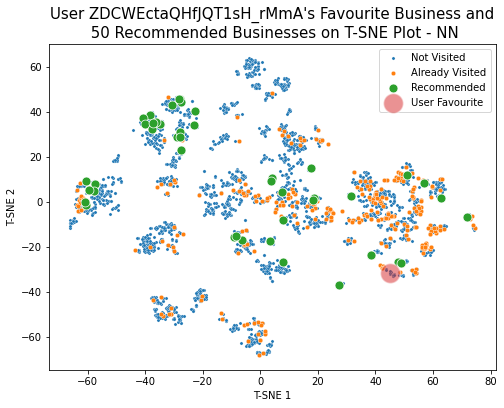

In [144]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_business_tsne_nn[df_business_tsne_nn['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10, label = 'Not Visited')
sns.scatterplot(data = df_business_tsne_nn.loc[visited_keys], x = 'T-SNE1', y = 'T-SNE2', s = 20, label = 'Already Visited')
sns.scatterplot(data = df_business_tsne_nn[df_business_tsne_nn['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')
sns.scatterplot(data = pd.DataFrame(df_business_tsne_nn.loc[fav_key, :]).T, x = 'T-SNE1', y = 'T-SNE2', s = 400, label = 'User Favourite', alpha = 0.5)
plt.legend()
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title("User ZDCWEctaQHfJQT1sH_rMmA's Favourite Business and\n 50 Recommended \
Businesses on T-SNE Plot - NN", size = 15)
plt.show()

Something different about this T-SNE plot from any of the previous ones is that the recommended businesses are not concentrated around the user's favourite, but are more widely spread across the plot.

To explain this difference, the T-SNE plot of all the businesses is reviewed, colour-labelled by their adjusted ratings.

In [145]:
# Create adjusted_ratings Array
business_ratings = np.array(df_business.reset_index()['business_id'].map(df[['business_id', 'business_rating']].drop_duplicates(subset = 'business_id', keep = 'first').set_index('business_id')['business_rating'])).reshape(-1,1)

In [146]:
# Create the T-SNE dataframe for the NN recommended businesses 
df_business_tsne_popular = pd.DataFrame(np.hstack([business_tsne, business_ratings, recommended_business_nn]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'business_rating', 'recommended'])

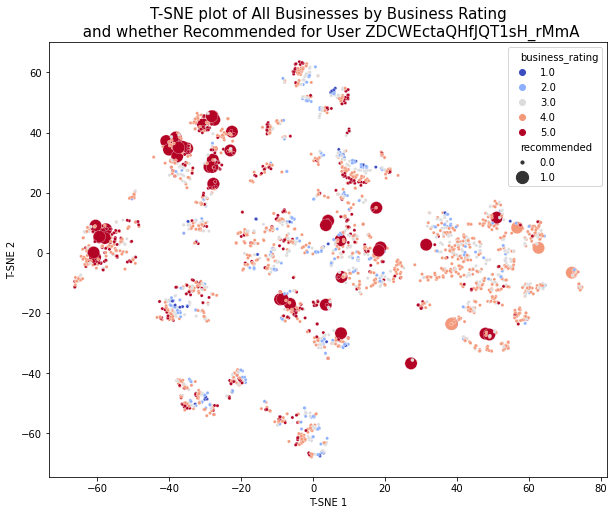

In [147]:
# Plot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_business_tsne_popular, x = 'T-SNE1', y = 'T-SNE2', hue = 'business_rating', size = 'recommended', sizes = (150, 10), palette = 'coolwarm')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title("T-SNE plot of All Businesses by Business Rating\n and whether Recommended for \
User ZDCWEctaQHfJQT1sH_rMmA", size = 15)

plt.show()

It can be seen that, among the 50 recommendations made to the user 'ZDCWEctaQHfJQT1sH_rMmA', most had the average business rating of 5. 

It was seen earlier in the analysis (during the EDA stage) that, while most of the data had low correlation with the adjusted rating, the business rating and user average star were the two independent variables relatively highly correlated.

It appears based on this observation that, for the neural network approach, the business rating (and likely the average star given by a user) are the key driving factors in the prediction of a business' adjusted rating given by a user. In other words, it focuses on the general popularity and the user's average rating when determining how much a given user will rate a given business rather than the personal taste based on the business attributes which were seen to be only loosely related to the adjusted rating.

### 5.6 Final Model Selection & Optimization

#### 5.6.1 Model Comparison

The content-based filtering method using cosine similarity recommends businesses that are similar to a given user's favourite, and no prediction is made on the rating. The performance of this model can be measured by reviewing the cosine distance between business(es) actually liked by the user and the recommendations. In terms of this distance, the content-based method was seen to outperform the collaborative filtering method.

The neural network, on the other hand, predicts the rating given user and business information, and the model performance is measured using Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) on the test set. It was seen that the neural network generally predicts the ratings of popular businesses and generous users high without paying as much attention to each user's personal preferences. In terms of both RMSE and MAE, neural network was seen to outperform the collaborative filtering method.

The performances of the content-based and neural network methods can be summarized as follows:

- **Content-Based :** 0.21 cosine distance between recommendations and actually liked business(es)
- **Neural Network :** 0.96 Test RMSE, 0.68 Test MAE

For the optimal recommender, it is ideal to benefit from each type of recommender - i.e., a recommender that recommends according to one's taste, but also suggests generally popular businesses that a given reviewer hasn't tried yet (i.e. not yet reviewed on Yelp). To accomplish this, a **"hybrid"** model is created by combining these two models.

#### 5.6.2 Model Optimization (Hybrid Recommender)

A hybrid recommender making 10 recommendations is created. Of these 10 recommendations, it is programmed that 5 are the top five businesses from both the content-based and neural network models, 3 are from the content-based model, and 2 are from neural network.

#### Getting  Hybrid Recommendations

The hybrid recommender using both content-based filtering and neural network will make recommendations in the following algorithm.

1. For a given user, if the given user's most highly rated business is rated greater than or equal to 4, find the full list of businesses not yet reviewed by the user, in the descending order of cosine similarity to the user's most highly rated business using content-based filtering.


2. For a given user, find the full list of businesses not yet reviewed by the user, in the descending order of predicted rating  using neural network. If the given user's most highly rated business is rated less than 4, ignore content-based filtering and make 10 recommendations from this list.


3. From the two lists each created in step 1. and 2., select the first five businesses appearing in both lists.


4. From the content-based recommendations, select the top three businesses not appearing in the businesses selected in 3.


5. From the neural network recommendations, select the top two businesses appearing in neither list from 3. and 4.


6. Combine the lists from 3.-6. to make ten distinct recommendations.


7. Special Case : If a given user does not exist in the cleaned dataset `df`, then simply make 10 recommendations based on the mean adjusted ratings from all reviews in the dataset.

In [162]:
# Create a function making recommendations using hybrid of content-based filtering and neural network

def get_recommendations_hybrid(user : str) -> list:
    
    """
    Given a user id, this function prints a list of recommended businesses that
    the given user has not reviewed on yet.
    """
    
    """
    Simple Recommendations
    """
    # If a given user does not exist in Dataframe df, then simply recommend top 10 businesses with mean adjusted ratings
    if user not in pd.unique(df.user_id):
        simple_recommendations = df.groupby('business_id').mean()['adjusted_rating'].sort_values(ascending = False).index[:10]
        # Print recommendations in order
        print('Welcome to Yelp, try these most popular places on Yelp!\n')
        for i in simple_recommendations:
            print(df_business_names.loc[df_business_names['business_id'] == i, 'name'].values[0])
        return list(simple_recommendations)
    
    """
    Content-Based Filtering
    """
    # Select the given user's favourite business and return its business id 
    fav_business = (df.loc[df.user_id == user, ['business_id', 'adjusted_rating']].sort_values(by = 'adjusted_rating', ascending = False))['business_id'].values[0]
    
    # Continue with content-based filtering only if the user's most highly rated business is greater than or equal to 4  
    if df.loc[(df['business_id'] == fav_business) & (df['user_id'] == user), 'adjusted_rating'].values[0] >= 4:
    
        # List of business ids sorted by cosine similarity
        index_recommendations = list(cos_sim_df.loc[fav_business].sort_values(ascending=False).index)[1:]

        # Recommendation list - only businesses that have not yet been reviewed by a given user will be appended to this list
        recommendations_content = []

        # Add recommendation to list if not already reviewed
        for i in range(len(index_recommendations)):

            # Select the business to recommend 
            fav = index_recommendations[i]

            # If reviewer has not yet already written a review on the selected business, add to recommendation  & similarity lists
            if fav not in pd.unique(df.loc[df.user_id == user, 'business_id']):
                recommendations_content.append(fav)
            
    
    """
    Neural Network
    """   
    # Find all business already reviewed by given user
    reviewed_business = pd.unique(df.loc[df['user_id'] == user, 'business_id'])
    
     # Find all businesses not yet reviewed by given user
    unreviewed_business = list(df_business[~np.isin(df_business.index, reviewed_business)].index)
    
    # Create all user-business combinations for the given user and all businesses the user did not review 
    df_unreviewed_businesses = X_business_replace_df.loc[unreviewed_business].reset_index(drop = False)
    df_user_recommend = pd.concat([X_user_replace_df.loc[[user],:]]* len(df_unreviewed_businesses), ignore_index=True)
    df_combined = pd.concat([df_unreviewed_businesses, df_user_recommend], axis = 1).set_index('business_id')
    
    # All business indices
    recommendation_indices = df_combined.index
    
    # All business & user attributes to input into NN
    X_check = torch.tensor(df_combined.values, dtype = torch.float32)
        
    # Create an empty dictionary of ratings
    y_pred = nn_rater.predict(X_check).detach().numpy().reshape(-1)
    
    # Create a Series object containing business indices and corresponding ratings
    df_recommendations = pd.Series(y_pred, index = recommendation_indices)
    
    # Create a list of recommendations
    recommendations_nn = list(df_recommendations.sort_values(ascending = False).index)
    
    # If the user's most highly rated business is less than 4, just return the recommendations from Neural Network
    if df.loc[(df['business_id'] == fav_business) & (df['user_id'] == user), 'adjusted_rating'].values[0] < 4:
        # Print recommendations in order
        print("You can't go wrong with these places. Why don't you give them a try!\n")
        for i in recommendations_nn[:10]:
            print(df_business_names.loc[df_business_names['business_id'] == i, 'name'].values[0])
        return recommendations_nn[:10]
    
    """
    Combinations
    """
    # Create three empty bins
    
    # A - First 5 businesses appearing in both content-based and NN approaches
    final_recommendations_both = set()
    
    # B - Top 3 businesses from content-based (aside from the first 5 businesses appearing in both approaches)
    final_recommendations_content = []
    
    # C - Top 2 busisensses from neural network (aside from the first 5 businesses appearing in both approaches)
    final_recommendations_nn = []
    
    # A - Looping over the item & index of content-based recommendations
    for i, j in enumerate(recommendations_content):
               
        # If item from content-based is also in the neural network recommendations up to current index, add to set
        if j in recommendations_nn[:i+1]:
            final_recommendations_both.add(j)
        # If item from neural network is also in the content-based recommendations up to current index, add to set
        elif recommendations_nn[i] in recommendations_content[: i+1]:
            final_recommendations_both.add(recommendations_nn[i])
        # Stop when we have added five recommendations
        if len(final_recommendations_both) == 5:
            break
    
    # B - Looping over the item & index of content-based recommendations
    for i, j in enumerate(recommendations_content):
        
        # If item from content-based is not in Set A created above,
        if j not in final_recommendations_both:
            # Append item to list of content-based recommendations
            final_recommendations_content.append(j)
        # Stop when we have added three recommendations
        if len(final_recommendations_content) == 3:
            break
    
    # C - Looping over the item & index of neural network recommendations
    for i, j in enumerate(recommendations_nn):
        # If item from neural network is neither in Set A nor content-based recommendations created above 
        if (j not in final_recommendations_both) and (j not in final_recommendations_content):
            # Append item to list of neural network recommendations
            final_recommendations_nn.append(j)
        # Stop when we have added two recommendations
        if len(final_recommendations_nn) == 2:
            break
    
    # Combine Recommendations A, B, and C
    final_recommendations = final_recommendations_content + final_recommendations_nn + list(final_recommendations_both)
    
    # Print recommendations in order
    print(f'Because you liked "{(df_business_names.loc[df_business_names["business_id"] == fav_business, "name"]).values[0]}", these popular places similar to {(df_business_names.loc[df_business_names["business_id"] == fav_business, "name"]).values[0]} are recommended\n')
    for i in final_recommendations:
        print(df_business_names.loc[df_business_names['business_id'] == i, 'name'].values[0])
    
    # Return result
    return final_recommendations

#### Case 1- User with At Least One Satisfactory Review (i.e., Adjusted Rating >= 4)

Now, recommendations are made using the function above for the arbitrary user 'ZDCWEctaQHfJQT1sH_rMmA'. This user has made many reviews on Yelp, many which exceed 4-star rating.

In [163]:
# Make recommendations
example_recommendations_hybrid = get_recommendations_hybrid('ZDCWEctaQHfJQT1sH_rMmA')

Because you liked "La Paloma Cafe", these popular places similar to La Paloma Cafe are recommended

Bibi Ji
Somerset
Les Marchands Restaurant & Wine Shop
Segway of Santa Barbara
Shades Spray Tans
Venus in Furs
Uncorked Wine Tasting and Kitchen
The Daisy Restaurant
Aperitivo
Loquita


The above businesses are plotted on the T-SNE plot.

In [150]:
# Creating an index array of whether a business is one of the recommendations above or not
recommended_business_hybrid = np.isin(df_business.index, example_recommendations_hybrid).reshape(-1,1)

In [151]:
# Create the T-SNE dataframe for the Hybrid recommended businesses 
df_business_tsne_hybrid = pd.DataFrame(np.hstack([business_tsne, recommended_business_hybrid, business_ratings]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'recommended', 'business_ratings'])

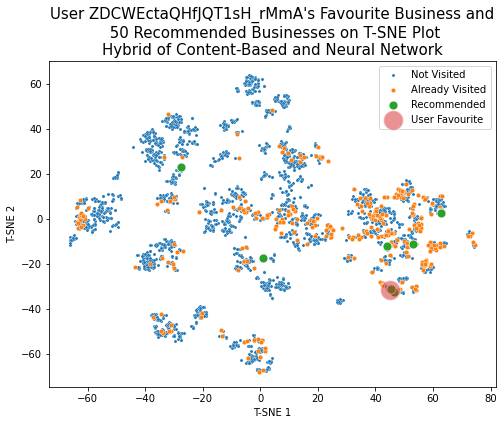

In [152]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_business_tsne_hybrid[df_business_tsne_hybrid['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10, label = 'Not Visited')
sns.scatterplot(data = df_business_tsne_hybrid.loc[visited_keys], x = 'T-SNE1', y = 'T-SNE2', s = 20, label = 'Already Visited')
sns.scatterplot(data = df_business_tsne_hybrid[df_business_tsne_hybrid['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')
sns.scatterplot(data = pd.DataFrame(df_business_tsne_hybrid.loc[fav_key, :]).T, x = 'T-SNE1', y = 'T-SNE2', s = 400, label = 'User Favourite', alpha = 0.5)
plt.legend()
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title("User ZDCWEctaQHfJQT1sH_rMmA's Favourite Business and\n 50 Recommended \
Businesses on T-SNE Plot\nHybrid of Content-Based and Neural Network", size = 15)
plt.show()

For this user, as intended, a few recommendations are made similar to the user's favourite, as well as some other recommendations that are not necessarily similar to the user's favourite but are predicted to be enjoyed by the user.

#### Case 2- New User

For the new users not on record, as mentioned, 10 recommendations are made simply based on the businesses' mean adjusted rating across the entire dataset.

In [153]:
# Make recommendations
example_recommendations_hybrid = get_recommendations_hybrid('random_code_not_existing_in_df')

Welcome to Yelp, try these most popular places on Yelp!
Percy Sales Events
A Crimson Holiday
Santa Barbara Airbrush Tanning
Green Table's Guilt Free OYE
Party Central Photo Booth
Pura Luna Apothecary & Full Spiral Salon
Action Photo Booth
Santa Barbara Fit Body Boot Camp
Room For Cake
Seventh Dimension Dance


In [154]:
# Creating an index array of whether a business is one of the recommendations above or not
recommended_business_hybrid = np.isin(df_business.index, example_recommendations_hybrid).reshape(-1,1)

In [155]:
# Create the T-SNE dataframe for the Hybrid recommended businesses 
df_business_tsne_hybrid = pd.DataFrame(np.hstack([business_tsne, recommended_business_hybrid, business_ratings]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'recommended', 'business_ratings'])

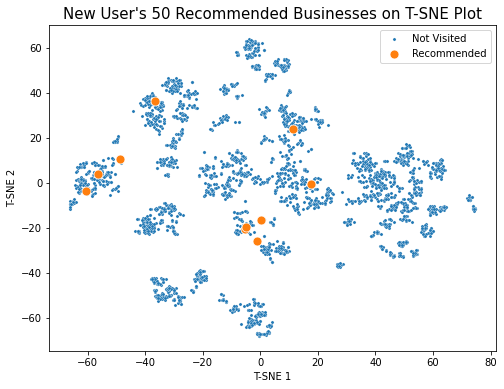

In [156]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_business_tsne_hybrid[df_business_tsne_hybrid['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10, label = 'Not Visited')
sns.scatterplot(data = df_business_tsne_hybrid[df_business_tsne_hybrid['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')

plt.legend()
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title("New User's 50 Recommended Businesses on T-SNE Plot", size = 15)
plt.show()

To all new users, the same 10 businesses shown immediately above will be recommended.

#### Case 3 - User with only Poor Reviews

For users who are not satisfied with any of the businesses they have written reviews on, all recommendations are made based on the neural network predictions.

In [157]:
# Randomly select a user with just 1 poor review on Yelp

# Get review counts for all users
review_counts = df.groupby('user_id').count()['business_id']

# Find a user with just 1 review less than 4-star rating
unsatisfied_user_id = df[(df['user_id'].map(review_counts) == 1) & df['adjusted_rating'] < 4]['user_id'].values[0]

In [158]:
# Make recommendations
example_recommendations_hybrid = get_recommendations_hybrid(unsatisfied_user_id)

You can't go wrong with these places. Why don't you give them a try!
Gladden and Sons Produce
Mezza Thyme
The House of Clues
Sanguis
HP Autosport
AR Catering
The Narrative Loft
Doug Ellis Photography
Dj Hecktik
Sustainable Wine Tours


In [159]:
# Creating an index array of whether a business is one of the recommendations above or not
recommended_business_hybrid = np.isin(df_business.index, example_recommendations_hybrid).reshape(-1,1)

In [160]:
# Create the T-SNE dataframe for the Hybrid recommended businesses 
df_business_tsne_hybrid = pd.DataFrame(np.hstack([business_tsne, recommended_business_hybrid, business_ratings]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'recommended', 'business_ratings'])

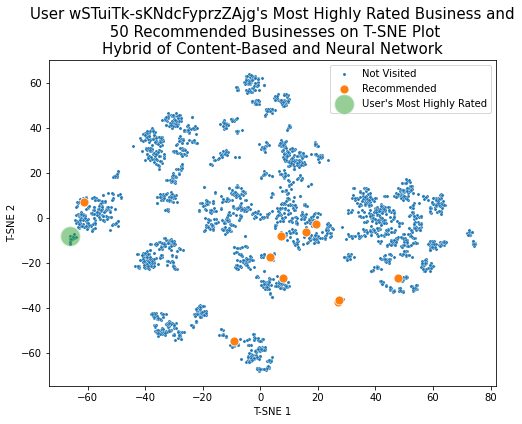

In [161]:
fav_key = (df.loc[df.user_id == unsatisfied_user_id, ['business_id', 'adjusted_rating']].sort_values(by = 'adjusted_rating', ascending = False))['business_id'].values[0]

# Business ids of businesses already visited and reviewed by ZDCWEctaQHfJQT1sH_rMmA
visited_keys = pd.unique(df[(df['user_id'] == unsatisfied_user_id) & (df['business_id'] != fav_key)]['business_id'])

# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_business_tsne_hybrid[df_business_tsne_hybrid['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10, label = 'Not Visited')
sns.scatterplot(data = df_business_tsne_hybrid.loc[visited_keys], x = 'T-SNE1', y = 'T-SNE2', s = 20, label = 'Already Visited')
sns.scatterplot(data = df_business_tsne_hybrid[df_business_tsne_hybrid['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')
sns.scatterplot(data = pd.DataFrame(df_business_tsne_hybrid.loc[fav_key, :]).T, x = 'T-SNE1', y = 'T-SNE2', s = 400, label = "User's Most Highly Rated", alpha = 0.5)
plt.legend()
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title(f"User {unsatisfied_user_id}'s Most Highly Rated Business and\n 50 Recommended \
Businesses on T-SNE Plot\nHybrid of Content-Based and Neural Network", size = 15)
plt.show()

As seen, the recommender has made 10 recommendations without attempting to pick one similar to the user's most highly rated business, because the user was not satisfied with that business.

#### Random Review of 10 Other Businesses

The final hybrid recommender is used on 10 random users in the dataframe and the recommendations are reviewed on the T-SNE plot.

In [180]:
# Recreate a function making recommendations using hybrid of content-based filtering and neural network, without printing results

def get_recommendations_hybrid(user : str) -> list:
    
    """
    Given a user id, this function prints a list of recommended businesses that
    the given user has not reviewed on yet.
    """

    """
    Simple Recommendations
    """
    # If a given user does not exist in Dataframe df, then simply recommend top 10 businesses with mean adjusted ratings
    if user not in pd.unique(df.user_id):
        simple_recommendations = df.groupby('business_id').mean()['adjusted_rating'].sort_values(ascending = False).index[:10]
        return list(simple_recommendations)  
    
    """
    Content-Based Filtering
    """
    # Select the given user's favourite business and return its business id 
    fav_business = (df.loc[df.user_id == user, ['business_id', 'adjusted_rating']].sort_values(by = 'adjusted_rating', ascending = False))['business_id'].values[0]

    # Continue with content-based filtering only if the user's most highly rated business is greater than or equal to 4  
    if df.loc[(df['business_id'] == fav_business) & (df['user_id'] == user), 'adjusted_rating'].values[0] >= 4:
        
        # List of business ids sorted by cosine similarity
        index_recommendations = list(cos_sim_df.loc[fav_business].sort_values(ascending=False).index)[1:]

        # Recommendation list - only businesses that have not yet been reviewed by a given user will be appended to this list
        recommendations_content = []

        # Add recommendation to list if not already reviewed
        for i in range(len(index_recommendations)):

            # Select the business to recommend 
            fav = index_recommendations[i]

            # If reviewer has not yet already written a review on the selected business, add to recommendation  & similarity lists
            if fav not in pd.unique(df.loc[df.user_id == user, 'business_id']):
                recommendations_content.append(fav)
    
    """
    Neural Network
    """   
    # Find all business already reviewed by given user
    reviewed_business = pd.unique(df.loc[df['user_id'] == user, 'business_id'])
    
     # Find all businesses not yet reviewed by given user
    unreviewed_business = list(df_business[~np.isin(df_business.index, reviewed_business)].index)
    
    # Create all user-business combinations for the given user and all businesses the user did not review 
    df_unreviewed_businesses = X_business_replace_df.loc[unreviewed_business].reset_index(drop = False)
    df_user_recommend = pd.concat([X_user_replace_df.loc[[user],:]]* len(df_unreviewed_businesses), ignore_index=True)
    df_combined = pd.concat([df_unreviewed_businesses, df_user_recommend], axis = 1).set_index('business_id')
    
    # All business indices
    recommendation_indices = df_combined.index
    
    # All business & user attributes to input into NN
    X_check = torch.tensor(df_combined.values, dtype = torch.float32)
        
    # Create an empty dictionary of ratings
    y_pred = nn_rater.predict(X_check).detach().numpy().reshape(-1)
    
    # Create a Series object containing business indices and corresponding ratings
    df_recommendations = pd.Series(y_pred, index = recommendation_indices)
    
    # Create a list of recommendations
    recommendations_nn = list(df_recommendations.sort_values(ascending = False).index)

    # If the user's most highly rated business is less than 4, just return the recommendations from Neural Network
    if df.loc[(df['business_id'] == fav_business) & (df['user_id'] == user), 'adjusted_rating'].values[0] < 4:
        return recommendations_nn[:10]

    """
    Combinations
    """
    # Create three empty bins
    
    # A - First 5 businesses appearing in both content-based and NN approaches
    final_recommendations_both = set()
    
    # B - Top 3 businesses from content-based (aside from the first 5 businesses appearing in both approaches)
    final_recommendations_content = []
    
    # C - Top 2 busisensses from neural network (aside from the first 5 businesses appearing in both approaches)
    final_recommendations_nn = []
    
    # A - Looping over the item & index of content-based recommendations
    for i, j in enumerate(recommendations_content):
               
        # If item from content-based is also in the neural network recommendations up to current index, add to set
        if j in recommendations_nn[:i+1]:
            final_recommendations_both.add(j)
        # If item from neural network is also in the content-based recommendations up to current index, add to set
        elif recommendations_nn[i] in recommendations_content[: i+1]:
            final_recommendations_both.add(recommendations_nn[i])
        # Stop when we have added five recommendations
        if len(final_recommendations_both) == 5:
            break
    
    # B - Looping over the item & index of content-based recommendations
    for i, j in enumerate(recommendations_content):
        
        # If item from content-based is not in Set A created above,
        if j not in final_recommendations_both:
            # Append item to list of content-based recommendations
            final_recommendations_content.append(j)
        # Stop when we have added three recommendations
        if len(final_recommendations_content) == 3:
            break
    
    # C - Looping over the item & index of neural network recommendations
    for i, j in enumerate(recommendations_nn):
        # If item from neural network is neither in Set A nor content-based recommendations created above 
        if (j not in final_recommendations_both) and (j not in final_recommendations_content):
            # Append item to list of neural network recommendations
            final_recommendations_nn.append(j)
        # Stop when we have added two recommendations
        if len(final_recommendations_nn) == 2:
            break
    
    # Combine Recommendations A, B, and C
    final_recommendations = final_recommendations_content + final_recommendations_nn + list(final_recommendations_both)
    
    # Return result
    return final_recommendations

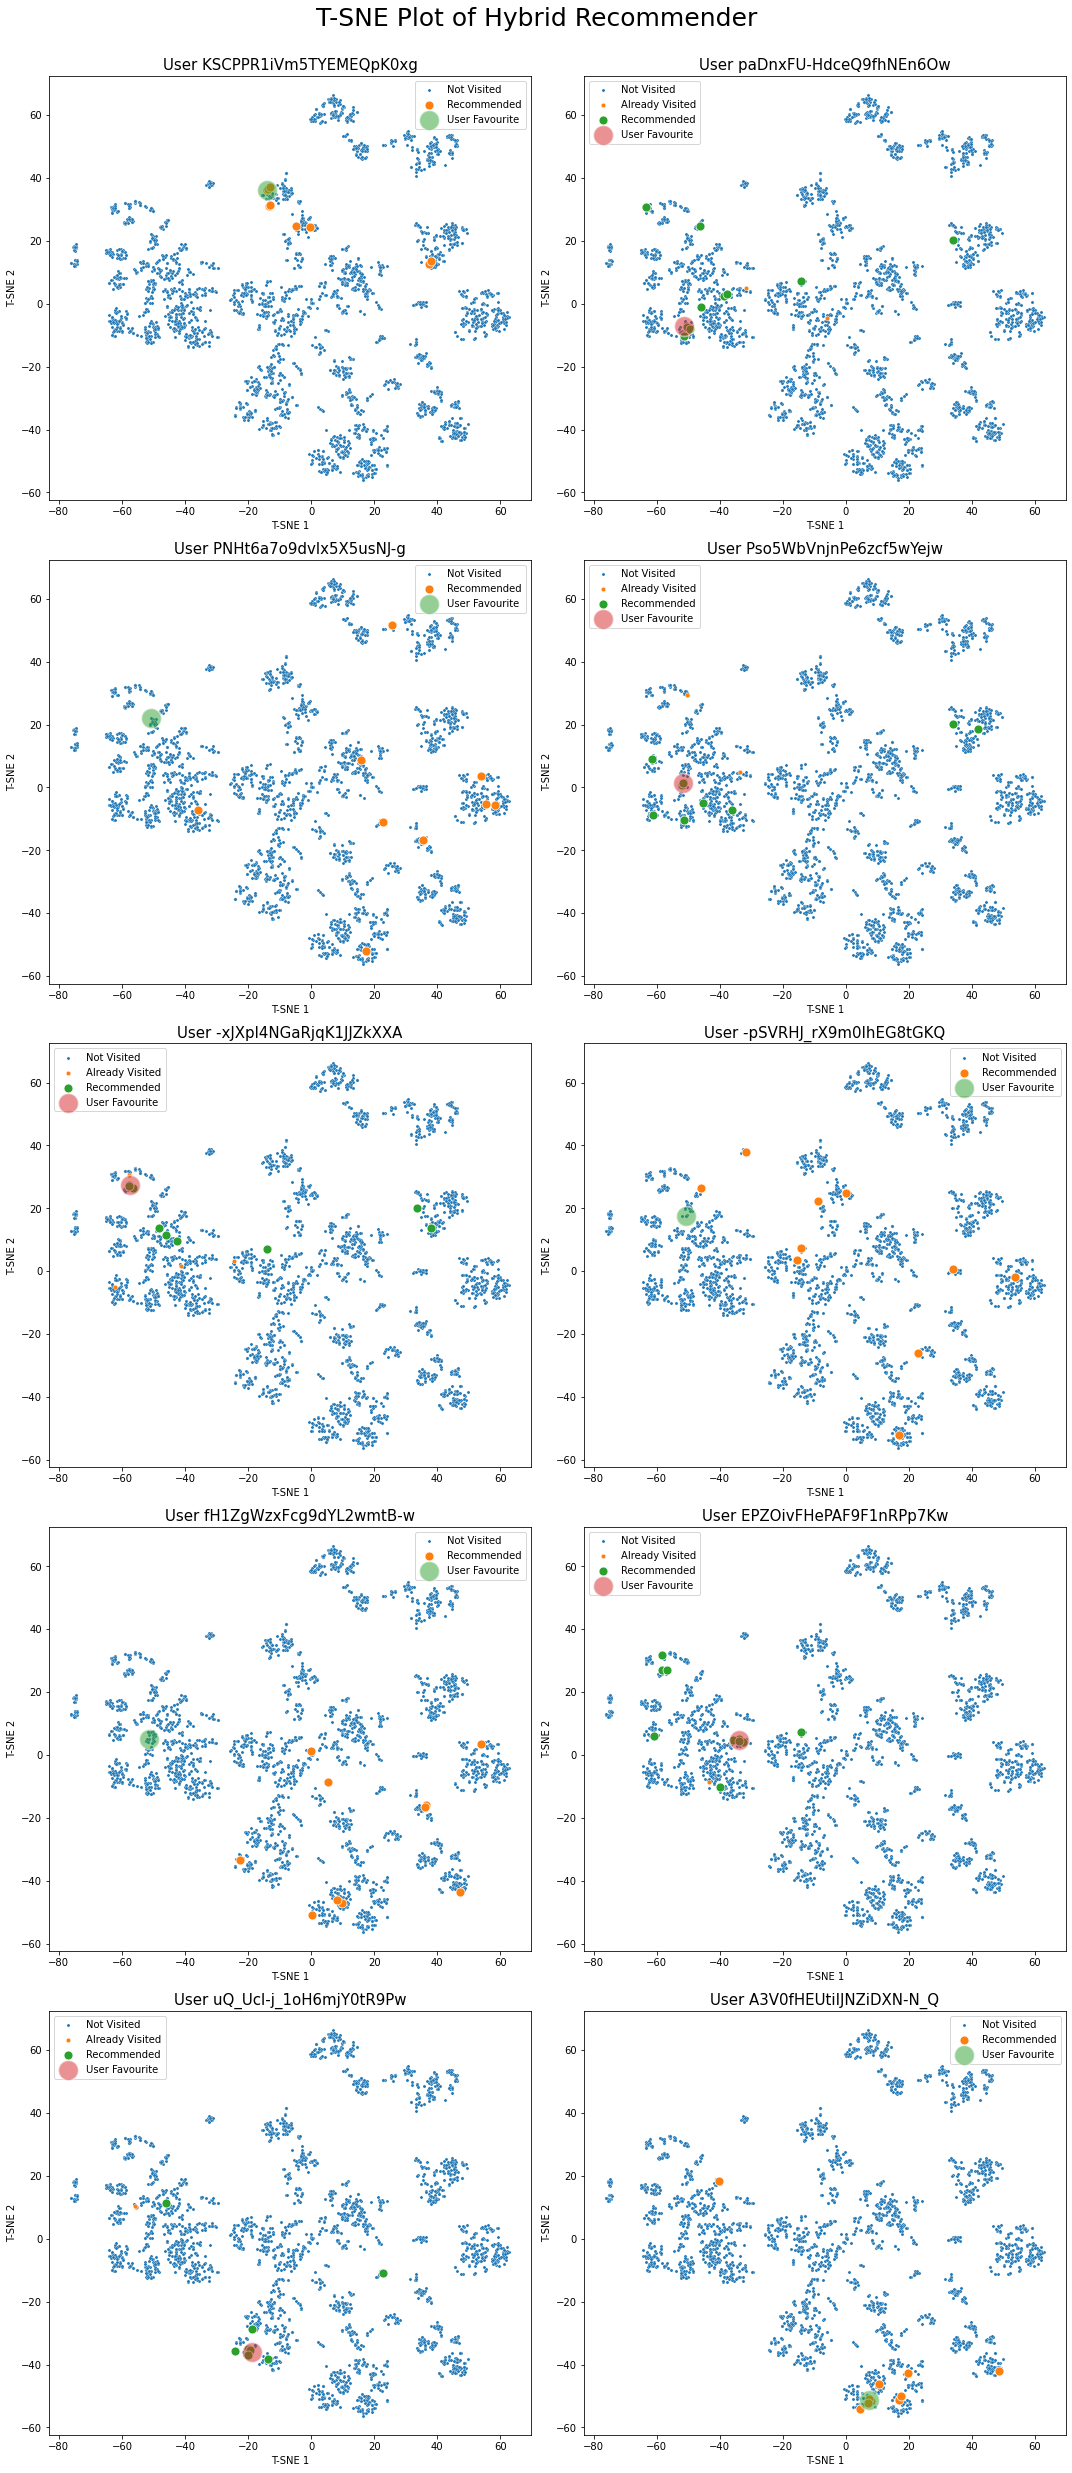

In [181]:
plt.subplots(5, 2, figsize = (15, 35))
for i, j in enumerate(np.random.choice(pd.unique(df_scaled['user_id']),10)):
    # Make recommendations
    example_recommendations_hybrid = get_recommendations_hybrid(j)
    
    # Creating an index array of whether a business is one of the recommendations above or not
    recommended_business_hybrid = np.isin(df_business.index, example_recommendations_hybrid).reshape(-1,1)
    
    # Create the T-SNE dataframe for the Hybrid recommended businesses 
    df_business_tsne_hybrid = pd.DataFrame(np.hstack([business_tsne, recommended_business_hybrid, business_ratings]), index = df_business.index,\
                                  columns = ['T-SNE1', 'T-SNE2', 'recommended', 'business_ratings'])
    
    
    fav_key = (df.loc[df.user_id == j, ['business_id', 'adjusted_rating']].sort_values(by = 'adjusted_rating', ascending = False))['business_id'].values[0]
    
    # Business ids of businesses already visited and reviewed by ZDCWEctaQHfJQT1sH_rMmA
    visited_keys = pd.unique(df[(df['user_id'] == j) & (df['business_id'] != fav_key)]['business_id'])
    
    # Plot
    plt.subplot(5, 2, i + 1)
    sns.scatterplot(data = df_business_tsne_hybrid[df_business_tsne_hybrid['recommended'] == 0], x = 'T-SNE1', y = 'T-SNE2', s = 10, label = 'Not Visited')
    sns.scatterplot(data = df_business_tsne_hybrid.loc[visited_keys], x = 'T-SNE1', y = 'T-SNE2', s = 20, label = 'Already Visited')
    sns.scatterplot(data = df_business_tsne_hybrid[df_business_tsne_hybrid['recommended'] == 1], x = 'T-SNE1', y = 'T-SNE2', s = 80, label = 'Recommended')
    sns.scatterplot(data = pd.DataFrame(df_business_tsne_hybrid.loc[fav_key, :]).T, x = 'T-SNE1', y = 'T-SNE2', s = 400, label = 'User Favourite', alpha = 0.5)
    plt.legend()
    plt.xlabel('T-SNE 1')
    plt.ylabel('T-SNE 2')
    plt.title(f"User {j}", size = 15)

plt.suptitle(f"T-SNE Plot of Hybrid Recommender\n\n", size = 25)
plt.tight_layout()
plt.show()

In [183]:
# Review User 'fH1ZgWzxFcg9dYL2wmtB-w'
df.loc[df['user_id'] == 'fH1ZgWzxFcg9dYL2wmtB-w', 'adjusted_rating']

3926852    3.531075
Name: adjusted_rating, dtype: float64

In [186]:
# Review User '-pXVRHJ_rX9m0lhEG8tGKQ'
df.loc[df['user_id'] == '-pSVRHJ_rX9m0IhEG8tGKQ', 'adjusted_rating']

6258219    1.1791
Name: adjusted_rating, dtype: float64

From the 10 T-SNE plots above, it can be seen that, generally, 5-8 of the recommended businesses are similar to the given user's favourite (i.e. most highly rated) business.

Given that most users write no more than 1 or 2 reviews, this favourite business is the user's only reviewed business or one of very few. Since most users rate businesses higher than 4 in their reviews, content-based filtering is activated to recommend similar businesses, resultantly making many recommendations close to the user's most highly rated business on the T-SNE plot.

For the users for who only wrote poor reveiws (i.e. rating below 4), the recommended businesses were not similar to the users' most highly rated businesses.

At least two recommendations are from the Neural Network approach. These recommendations are not necessarily similar to the user's most highly rated business but are from the neural network's prediction of the user's favourite business. Generally, these recommendations from neural network are businesses with high average rating, which the user might also enjoy regarless of their preferences.

## 6. Summary

To automate the process of making customized recommendations for every user on Yelp on local businesses in Santa Barbara, California, semi-structured data (i.e. in json format) on all user activities and business information is obtained from Yelp. 

This data is cleaned into the desired format for data analysis and modelling of recommenders.

From the data analysis, several insights are drawn, most important of which are that the users' and businesses' average ratings are the two key factors correlated with the user rating on a business, and the rest are more dependent on user preferences.

Several recommendation algorithms are considered, from which content-based filtering and neural network are selected for the final recommender. This is due to the fact that content-based filterin can make recommendations that are similar to a given user's favourite business, and that a neural network can make the most accurate prediction on a given user's satisfaction level with a given business based on a high-order mathematical relationship learned through deep learning.

The two recommenders are combined to the final "hybrid" recommender, so that five recommendations are made considering both algorithms, three solely considering the content-based algorithm, and two the neural-network algorithm.

Some special cases are also handled in the development of the recommender. Specifically, if a user's most highly rated business is rated below 4, which is considered not satisfactory enough, then all 10 recommendations are made from the neural network algotithm. Also, if a given user does not exist in the main dataset of all reviews in Santa Barbara, CA, the ten recommendations are made simply based on the highest mean adjusted ratings of all businesses.